# Исследование данных о продажах игр

# Описание проекта
Сейчас декабрь 2016 г. 

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников взяты **исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы** (например, Xbox или PlayStation) до 2016 года. 

Задача: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#История-платформ" data-toc-modified-id="История-платформ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>История платформ</a></span></li><li><span><a href="#check" data-toc-modified-id="check-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>check</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выпуск-игр-по-годам" data-toc-modified-id="Выпуск-игр-по-годам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выпуск игр по годам</a></span></li><li><span><a href="#Выпуск-игр-по-платформам" data-toc-modified-id="Выпуск-игр-по-платформам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Выпуск игр по платформам</a></span></li><li><span><a href="#Характерный-срок-платформ" data-toc-modified-id="Характерный-срок-платформ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Характерный срок платформ</a></span></li><li><span><a href="#Влияние-отзывов-на-продажи" data-toc-modified-id="Влияние-отзывов-на-продажи-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Влияние отзывов на продажи</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Пропуски-в-rating" data-toc-modified-id="Пропуски-в-rating-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Пропуски в <em>rating</em></a></span></li><li><span><a href="#NA" data-toc-modified-id="NA-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>NA</a></span></li><li><span><a href="#JP" data-toc-modified-id="JP-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>JP</a></span></li><li><span><a href="#EU" data-toc-modified-id="EU-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>EU</a></span></li></ul></li><li><span><a href="#Гипотезы" data-toc-modified-id="Гипотезы-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Гипотезы</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-№1" data-toc-modified-id="Гипотеза-№1-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Гипотеза №1</a></span></li><li><span><a href="#Гипотеза-№2" data-toc-modified-id="Гипотеза-№2-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Гипотеза №2</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Подготовка данных

In [1]:
# Импорт библиотек
import pandas as pd
import math
import re

# Для моды
import statistics

from scipy import stats as st
import numpy as np

# импорт tqdm для строки прогресса выполнения
from tqdm import tqdm

# импорт matplotlib для построения графиков 
import matplotlib.pyplot as plt
import matplotlib

# импорт seaborn для построения графиков
import seaborn as sns

In [2]:
# записываем датафрейм в переменную
try:
    df = pd.read_csv('/datasets/games.csv')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df = pd.read_csv('datasets/games.csv')

In [3]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df.isna().value_counts().to_frame()

0
Name  Platform Year_of_Release Genre NA_sales EU_sales JP_sales Other_sales Critic_Score User_Score Rating      
False False    False           False False    False    False    False       False        False      False   7878
                                                                            True         True       True    6534
                                                                                         False      False   1828
               True            False False    False    False    False       False        False      False    147
                                                                            True         True       True      85
               False           False False    False    False    False       False        False      True      72
                                                                            True         False      True      61
                                                                                         True       False     38
               True            False False    False    False    False       True         False      False     25
               False           False False    False    False    False       False        True       False     24
                                                                                                    True       9
               True            False False    False    False    False       False        True       False      5
                                                                            True         True       False      4
                                                                            False        False      True       2
True  False    False           True  False    False    False    False       True         True       True       2
False False    True            False False    False    False    False       True         False      True       1

Можно сказать, что нет однозначной связи между пропусками нет, <span class="mark">но большая их часть приходится на комбинацию</span> отсутсвия "Critic_Score, User_Score, Rating".

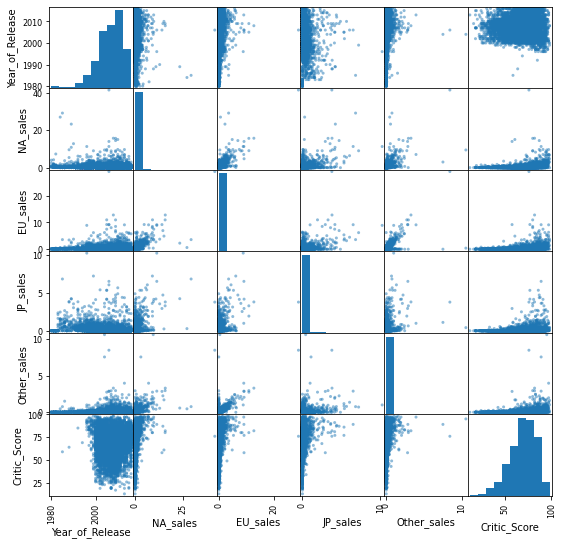

In [7]:
pd.plotting.scatter_matrix(df, figsize=(9, 9));

Переименуем столбцы.

In [8]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
# Приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [10]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [11]:
df.shape[0]

16715

In [12]:
# Удаление явных дубликатов
df = df.drop_duplicates().reset_index(drop=True)
df.shape[0]

16715

Преобразуем столбец "year_of_release" в дату.

In [13]:
df['year_of_release'].isna().sum()

269

In [14]:
# Удаление явных дубликатов
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()

df = df.drop_duplicates().reset_index(drop=True)
df.shape[0]

16715

Посмотрим на пропуски в данном столбце.

In [15]:
df.loc[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,gc,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В некоторых строках в названии игры есть год выпуска.

In [16]:
# Замена по году в названии (могут быть ошибки в 1 год)

с = 0 # счётчик
for new_string in df.loc[df['year_of_release'].isna(), 'name']:
    new_result = re.findall('[0-9]+', new_string)
    if (len(new_result) != 0):
        if (int(math.log10(int(new_result[0])))+1) == 4:
            с += 1
            df.loc[(df['name'].str.contains(new_result[0]) == True), 
                   'year_of_release'] = df[(df['name'].str.contains(new_result[0]) 
                                            == True)]['year_of_release'].fillna(int(new_result[0])-1)    

print('Число замен:', с)
print('Пропуски:', df['year_of_release'].isna().sum())

Число замен: 17
Пропуски: 252


In [17]:
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

### История платформ
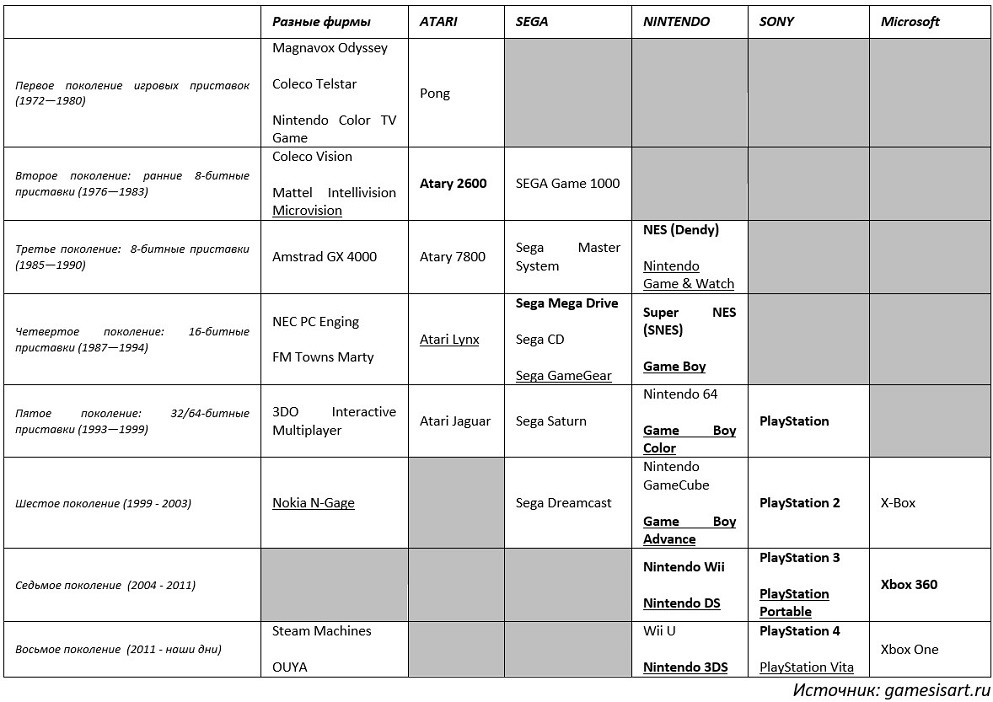

<span class="mark"><span class="mark"><span class="mark">PS</span></span>2</span> PlayStation 2 (официальное сокр. PS2) О начале разработки было объявлено в марте 1999 г., продажа консоли в Японии началась 4 марта 2000 г., в Северной Америке — 26 октября 2000 г., в Европе — 24 ноября 2000 года, в России — 7 ноября 2002 года.
Игровая приставка стала наиболее быстро продаваемой и самой популярной игровой консолью в истории.


<span class="mark">WII</span> 19 ноября 2006 года вышла игровая приставка Nintendo Wii. 


<span class="mark">NES</span> Впервые консоль появилась на японском рынке в 1983 году под названием. Famicom, а затем, переименованная в NES, вышла в Европе и США в 1985 году.


<span class="mark">GB</span> Nintendo. Первая портативная система семейства Game Boy была впервые выпущена в Японии 21 апреля 1989 года. В конце того же года система была выпущена в Северной Америке, а в конце 1990 года - в Европе.


<span class="mark">DS</span> Оригинальная Nintendo DS (Blue edition). Выпущена 21.11.2004 в Америке, 02.12.2004 в Японии и 11.03.2004 в Европе.


<span class="mark"><span class="mark"><span class="mark">Xbox</span></span> 360</span> была официально анонсирована на канале MTV 12 мая 2005 года, а более детальная информация о приставке была представлена в том же месяце на выставке Electronic Entertainment Expo (E3). Все доступные на время выпуска приставки были успешно проданы в каждой стране, кроме Японии.


<span class="mark">PS3</span> Выход PS3 в Японии состоялся 11 ноября 2006 года, 17 ноября приставка появилась в Северной Америке в первом квартале 2007 года), в марте 2007 года — в Европе, а потом в России.


<span class="mark">SNES</span> Super Nintendo Entertainment System, разработанная Масаюки Уэмурой, создателем Famicom, была выпущена в Японии 21 ноября 1990 года


<span class="mark">GBA</span> Nintendo выпущена 21 марта 2001 года в Японии, 11 июня 2001 года в Северной Америке, 22 июня 2001 года в регионе PAL, и 8 июня 2004 года в материковом Китае под названием iQue Game Boy Advance.


<span class="mark">PS4</span> Официальный анонс PlayStation 4 состоялся на конференции PlayStation Meeting 2013 в феврале 2013 года, продажи начались в ноябре 2013 года в США, Европе, Южной Америке, России и Австралии и в феврале 2014 года в Японии.


<span class="mark">3DS</span> Nintendo 3DS поступила в продажу в Японии 26 февраля 2011 года.


<span class="mark">N64</span> Nintendo 64, также Ultra 64 и N64 - 64-разрядная игровая приставка. Была выпущена в 1996 году и стала ответом на приставки конкурентов Sony PlayStation и Sega Saturn. 


<span class="mark">PS</span> Выход PS приставки состоялся 3 декабря 1994 года в Японии, в США приставка появилась 9 сентября 1995 года, а в Европе - 29 сентября 1995 года.


<span class="mark">Xbox</span> Первая приставка Xbox вышла на рынок 15 ноября 2001 год.


<span class="mark">PC</span> Первые игры на PC появились в 1960-х годах.


<span class="mark">VCS</span> Atari VCS, позже названная Atari 2600, появилась к Рождеству 1977 года и стала доминирующей игровой приставкой конца 1970-х — начала 1980-х.


<span class="mark">PSP</span> первая консоль была продемонстрирована публике 11 мая 2004 года на пресс-конференции, проводимой Sony в рамках E3 2004. Первые продажи консоли были начаты в Японии 12 декабря 2004 года, в Северной Америке 24 марта 2005 года, и в PAL-регионах 1 сентября 2005 года. 


<span class="mark">XOne</span> Xbox One:
Соединённые Штаты Америки 22 ноября 2013;
Европа 22 ноября 2013;
Япония 4 сентября 2014.

<span class="mark">Wii U</span> Название игровой консоли Nintendo, которая является преемником Wii. Система была представлена на пресс-конференции Nintendo 7 июня 2011 года на выставке E3 2011, выпущена в 2012 году.


<span class="mark">GC</span> <span class="mark">NG</span> Nintendo GameCube - GC (официально названная GCN на Западе и NGC в Японии):
Дата выхода	Япония 14 сентября 2001
Соединённые Штаты Америки 18 ноября 2001
Европейский союз 3 мая 2002


<span class="mark">GEN</span> Sega. Приставка была выпущена в 1988 году в Японии как Mega Drive, в 1989 году в США как Genesis и в 1990 году в Европе, Австралии и Бразилии - вновь под названием Mega Drive. 


<span class="mark">DC</span> Домашняя игровая приставка, выпущенная компанией Sega 27 ноября 1998 года в Японии, 9 сентября 1999 года в Северной Америке и 14 октября 1999 года в Европе.


<span class="mark">PSV</span> Выпущена в Японии 17 декабря 2011 года, в Северной Америке и Европе - 22 февраля 2012 года.


<span class="mark">SAT</span> Sega и выпущенная 22 ноября 1994 года в Японии, 11 мая 1995 года в Северной Америке и 8 июля 1995 года в Европе.


<span class="mark">SCD</span> Super CD-ROM развлекательной системы Super Nintendo (также известной как SNES SCD, Super Nintendo SCD и SNES Super CD) дополнение к развлекательной системе Super Nintendo, выпущенное в октябре 1992 года.

<span class="mark">WS</span> WonderSwan - портативная игровая консоль компании Bandai, выпущенная в 1999 году в Японии.

<span class="mark">TG16</span> TurboGrafx-16 известная за пределами Северной Америки как PC Engine дата выхода JP: 30 октября 1987.


<span class="mark">3DO</span> 3DO Interactive Multiplayer — игровая приставка, выпускавшаяся в 1993—1996 годах компаниями Panasonic, Sanyo, Creative и Goldstar.


<span class="mark">PCFX</span> 32-разрядная игровая консоль, разработанная компанией NEC. Преемник предыдущей консоли от этой компании, PC Engine. Выпущена в Японии 23 декабря 1994 года.

Перобразовать столбец "year_of_release" не получится, так как в нем есть пропуски. Проще эти данные исключить, так как их немного (252 шт.).

In [18]:
# Удаляем строки
df = df.loc[~df['year_of_release'].isna()]

У нас есть два пропуска среди жанров и имён. Рассмотрим их.

In [19]:
 df.loc[df['name'].isna() | df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [20]:
print('Всего для платформы "GEN"', df.loc[df['platform'] == "gen"].shape[0], 'игр')
print('Потери составят {:.2%}'.format(df.loc[df['name'].isna() | df['genre'].isna()].shape[0] 
                                      / df.loc[df['platform'] == "gen"].shape[0]))

Всего для платформы "GEN" 29 игр
Потери составят 6.90%


Так как эти пропуски взаимосвязаны и их немного, можно удалить.

In [21]:
# Удаляем строки
df = df.loc[~df['name'].isna()]
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         6610
rating             6682
dtype: int64

Остались только те пропуски, которые запонять нет осбого смысла. Проблема конечно есть - 8466 пропусков среди оценок критиков и 6610 оценок пользователей. Предположительно можно было бы сгруппировать по играм и если есть одинаковые серии игр, при отсутствии оценок у одних, экстраполлировать им от других.

df['user_score'] имеет элементы *tbd* - To Be Determined, то есть "Будет определено".

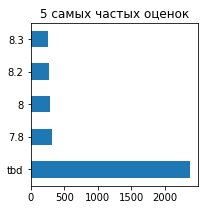

In [22]:
#df['user_score'] = df['user_score'].astype(float)
df['user_score'].value_counts().head(5).plot(kind='barh', figsize=(3,3), title='5 самых частых оценок');

In [23]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,ps2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,udraw studio,wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,just dance kids,wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,bust-a-move 3000,gc,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,mega brain boost,ds,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,plushees,ds,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [24]:
#df[['critic_score', 'user_score']]

df.query('user_score != "tbd"')['critic_score'].compare(df.query('user_score != "tbd"')['user_score'])

,self,other
0,76.0,8
2,82.0,8.3
3,80.0,8
6,89.0,8.5
7,58.0,6.6
...,...,...
16681,NaN,8.1
16692,80.0,7.6
16696,61.0,5.8
16702,60.0,7.2


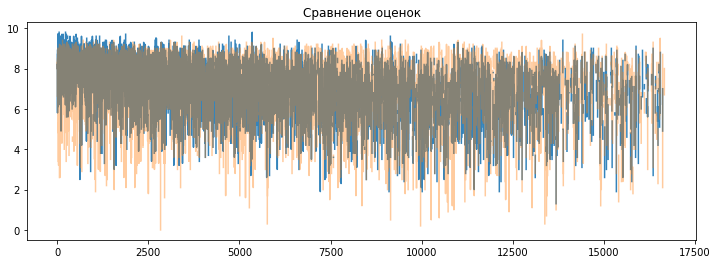

In [25]:
plt.figure().set_figwidth(12)

(df.query('user_score != "tbd"')['critic_score']/10).plot(alpha=0.9)
df.query('user_score != "tbd"')['user_score'].astype(float).plot(alpha=0.4)

plt.title("Сравнение оценок")
plt.show();

В целом, можно сказать, что эти графики близки, поэтому часть *tbd* можно заменить на 

    critic_score/10

In [26]:
# Изменеяем tbd
#df.loc[df['user_score'] == "tbd", 'user_score'] = df.query('user_score == "tbd"')['critic_score']/10

In [27]:
# Изменеяем tbd
df.loc[df['user_score'] == "tbd", 'user_score'] = float('nan')

In [28]:
df[['critic_score', 'user_score']].isna().sum()

critic_score    8466
user_score      8988
dtype: int64

In [29]:
df.loc[(df['critic_score'].isna()) & ~(df['user_score'].isna()), ['critic_score', 'user_score']]

,critic_score,user_score
255,NaN,4.8
263,NaN,4.9
264,NaN,4.5
291,NaN,8.2
359,NaN,6.2
...,...,...
16636,NaN,7.5
16643,NaN,6.6
16654,NaN,5.1
16661,NaN,8


In [30]:
df['critic_score'] = df['critic_score'].astype(float)
df['user_score'] = df['user_score'].astype(float)

In [31]:
# Замена части пропусков
df.loc[(df['critic_score'].isna()) 
       & ~(df['user_score'].isna()), 
       'critic_score'] = df.loc[(df['critic_score'].isna()) 
                                & ~(df['user_score'].isna()), 
                                'critic_score']\
.fillna(df.loc[(df['critic_score'].isna()) 
               & ~(df['user_score'].isna()), 
               'user_score']*10)

In [32]:
#df[['critic_score', 'user_score']].isna().sum()

In [33]:
df[df['critic_score'].isna()][['critic_score', 'user_score', 'rating']].isna().value_counts().to_frame()

0
critic_score user_score rating      
True         True       True    6585
                        False   1312

In [34]:
# Проверка уникальных значений
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 48., 45., 79., 70.,
       59., 64., 75., 60., 63., 42., 69., 32., 50., 25., 44., 55., 47.,
       57., 29., 65., 51., 54., 20., 53., 37., 30., 38., 33., 27., 52.,
       43., 35., 40., 46., 28., 39., 34., 31.,  0., 16., 41., 36., 24.,
       18., 17., 11., 26.,  3., 19., 23.,  7., 13.,  2., 21., 14.,  9.,
       12.,  6.])

In [35]:
# Переведем год в int
df['year_of_release'] = df['year_of_release'].astype(int)

In [36]:
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [37]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [38]:
df['all_sales'] = (df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'])

In [39]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [41]:
df['rating'].value_counts()

E       3930
T       2905
M       1537
E10+    1394
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [42]:
df['rating'].isna().sum()

6682

Рейтинги:
* E: Everyone can play it.
* M: Mature 17+
* T: For Teens
* K-A: Kids to Adults
* AO: Adults Only
* RP: Ratings are Pending
* E10+: Age of 10+ can play

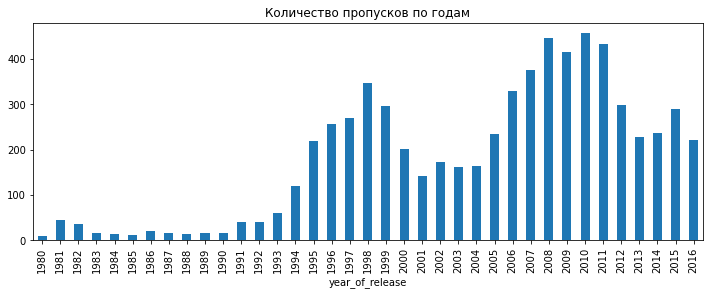

In [43]:
(df[df['rating'].isna()]
 .groupby('year_of_release')['name']
 .count()
 .plot(kind='bar', title='Количество пропусков по годам', figsize=(12,4))
);

In [44]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,gb,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,duck hunt,nes,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,nintendogs,ds,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


**Вывод по разделу:**
* заменены на *NaN* элементы *tbd*; 
* выполенна проверка на дубликаты;
* рассмотрено распредение пропусков в столбце *rating* по годам - решено отбросить неактуальные значения в ходе исследовательского анализа;
* группировка по возрастному рейтингу не имеет смысла на данном этапе.

## Исследовательский анализ данных

### Выпуск игр по годам

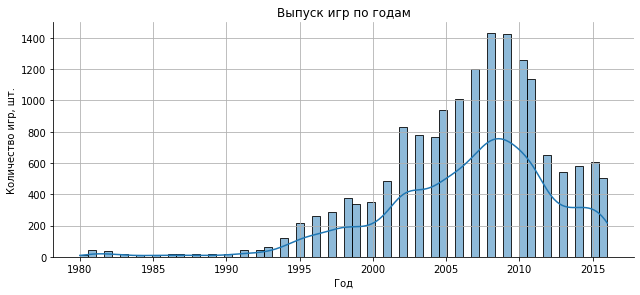

In [45]:
sns.displot(df['year_of_release'], kde = True, height=4, aspect=2.25);
plt.title("Выпуск игр по годам");
plt.grid(visible=True)
plt.ylabel('Количество игр, шт.');
plt.xlabel('Год');

Данные до 2008 года однозначно уже не имеют большой значимости. Пик выпуска игр приходится на 2002-2012 годы.

### Выпуск игр по платформам

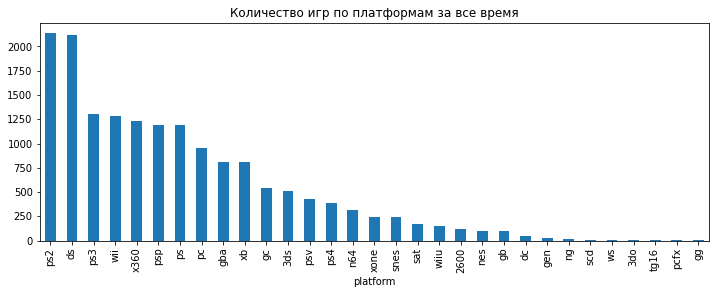

In [46]:
df.groupby('platform')['name']\
.count().sort_values(ascending=False)\
.plot(kind='bar', figsize=(12,4), title=('Количество игр по платформам за все время'));

У нас есть платформы с 1-ой игрой, но нас не интересуют настолько "специфичные" платформы. Возьмем те, у которых суммарно количество игр превышает 500 шт.

### Характерный срок платформ

In [47]:
display(df.query('(platform == "ds")&(year_of_release < 2004)').index)
df.query('(platform == "ds")')['name'].count()

Int64Index([15957], dtype='int64')

2122

In [48]:
df = df.drop(df.query('(platform == "ds")&(year_of_release < 2004)').index)
df.query('(platform == "ds")')['name'].count()

2121

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16460 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  int64  
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     8564 non-null   float64
 9   user_score       7473 non-null   float64
 10  rating           9779 non-null   object 
 11  all_sales        16460 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [50]:
import sys
sys. version

'3.9.5 | packaged by conda-forge | (default, Jun 19 2021, 00:32:32) \n[GCC 9.3.0]'

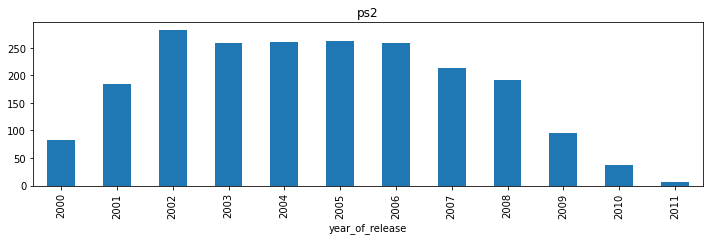

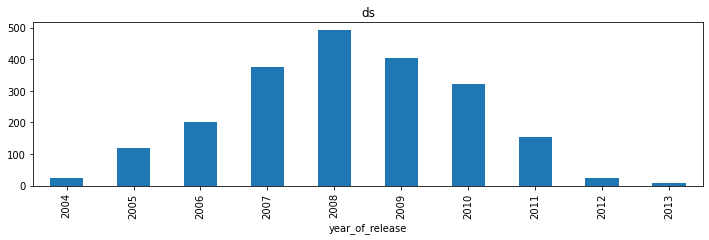

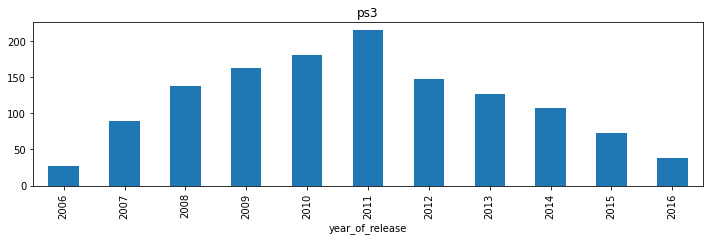

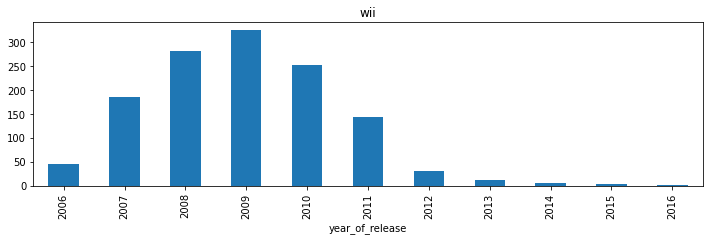

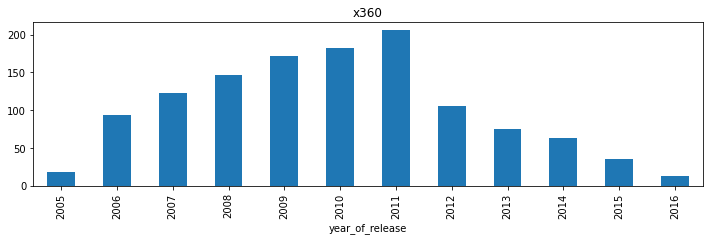

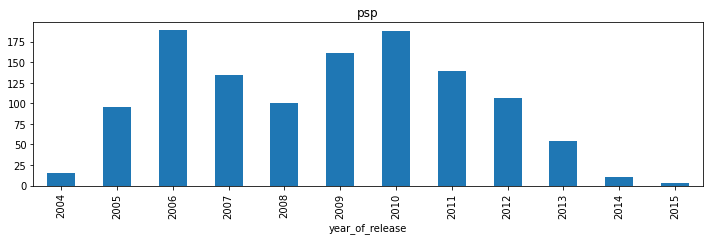

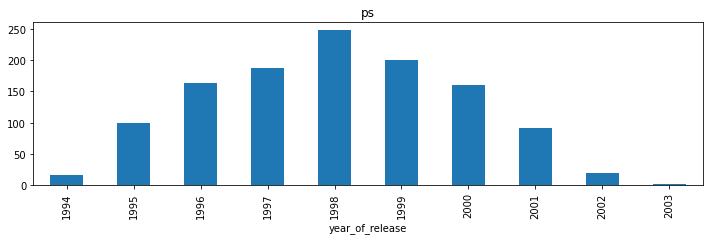

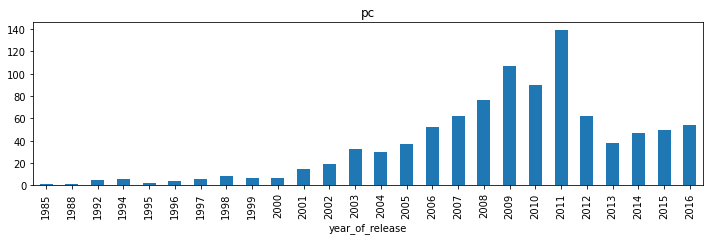

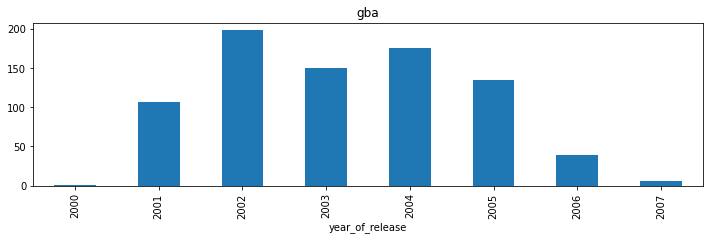

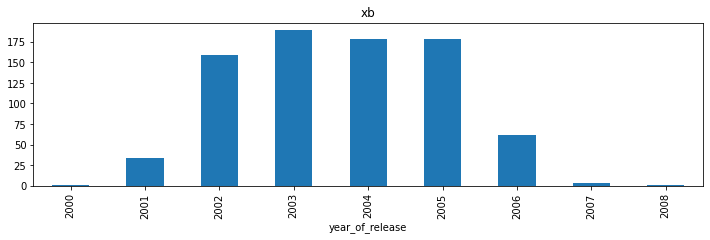

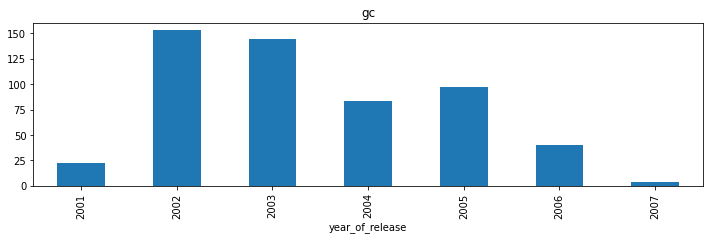

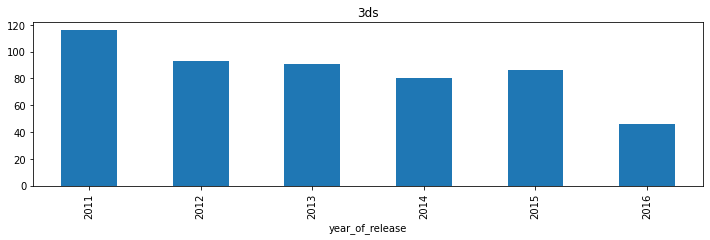

In [51]:
# Кол-во игр более 500
list_of_platforms = df.groupby('platform')['name'].count().sort_values(ascending=False) >= 500

for platform in list_of_platforms[list_of_platforms == True].index:
    df.query('platform == @platform')\
    .groupby('year_of_release')['name']\
    .count().plot(kind='bar', figsize=(12,3), title=(platform));
    plt.show()

Срок популярной жизни игровых платформ 5-9 лет.

In [52]:
# Массив для фильтрации новых платформ
list_of_platforms_delete = ['ps4', 'xone', 'wiiu', 'psv', '3ds']

In [53]:
# Крупные платформы

# Кол-во игр более 500
list_of_platforms = df.groupby('platform')['name'].count().sort_values(ascending=False) >= 500

# Массивы для датафрейма
platform_ = []
years_ = []

# Цикл перебора платформ
for platform in tqdm(list_of_platforms[list_of_platforms == True].index):
    mean = (
        df.query('platform == @platform')
    .groupby('year_of_release')['name']
    .count().mean()
    )
    
    quantile = (
        df.query('platform == @platform')
    .groupby('year_of_release')['name']
    .count().quantile(0.25)
               )
    
    years = (
        df.query('platform == @platform')
    .groupby('year_of_release')['name']
    .count() >= (mean - quantile)
    )

    platform_.append(platform)
    years_.append(years.sum())

platform_df = pd.DataFrame(data={'платформа':platform_, 'срок':years_}).sort_values(by='срок', ascending=False)
platform_df = platform_df.query('платформа != @list_of_platforms_delete')
platform_df

100%|██████████| 12/12 [00:00<00:00, 86.82it/s]


,платформа,срок
7,pc,13
2,ps3,10
0,ps2,9
4,x360,9
5,psp,8
6,ps,7
1,ds,5
3,wii,5
8,gba,5
9,xb,4


In [54]:
print('Среднее количество лет:', round(platform_df['срок'].mean(),2))

Среднее количество лет: 7.18


In [55]:
# Маленькие платформы

# Массив для выборки
list_of_platforms = df.groupby('platform')['name'].count().sort_values(ascending=False) <= 500

# Массивы для датафрейма
platform_ = []
years_ = []

# Цикл перебора платформ
for platform in tqdm(list_of_platforms[list_of_platforms == True].index):
    mean = (
        df.query('platform == @platform')
    .groupby('year_of_release')['name']
    .count().mean()
    )
    
    quantile = (
        df.query('platform == @platform')
    .groupby('year_of_release')['name']
    .count().quantile(0.25)
               )
    
    years = (
        df.query('platform == @platform')
    .groupby('year_of_release')['name']
    .count() >= (mean - quantile)
    )

    platform_.append(platform)
    years_.append(years.sum())

platform_df = pd.DataFrame(data={'платформа':platform_, 'срок':years_}).sort_values(by='срок', ascending=False)
platform_df = platform_df.query('платформа != @list_of_platforms_delete')
platform_df

100%|██████████| 19/19 [00:00<00:00, 77.73it/s]


,платформа,срок
9,gb,10
8,nes,10
4,snes,6
5,sat,5
2,n64,4
10,dc,4
12,ng,4
7,2600,3
11,gen,3
14,ws,3


In [56]:
print('Среднее количество лет:', round(platform_df['срок'].mean(),2))

Среднее количество лет: 3.93


[Определим **актуальный период**](#plt_life)

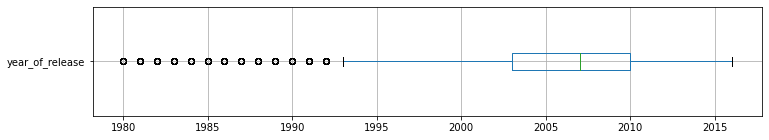

In [57]:
df.boxplot('year_of_release', vert=False, figsize=(12,2));

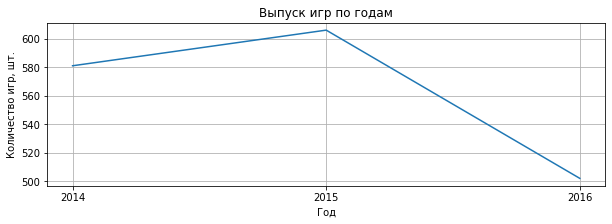

In [58]:
# График
graf = df.query('year_of_release >= 2014').groupby('year_of_release')['name'].count().plot(figsize=(10, 3));

formatter = matplotlib.ticker.FormatStrFormatter('%0.f')
locator = matplotlib.ticker.MaxNLocator(nbins='auto', steps=[1])
graf.xaxis.set_major_locator(locator)
graf.xaxis.set_major_formatter(formatter)

plt.title("Выпуск игр по годам");
plt.grid(visible=True)
plt.ylabel('Количество игр, шт.');
plt.xlabel('Год');

In [59]:
# Функция для отрисовки графика количества платформ в период с .. по ..
def plot_for_years(year1, year2):
    # Массивы для датафрейма
    platform_ = []
    years_ = []
    
    # Цикл для перебора по годам
    for year in df.query('@year1 <= year_of_release <= @year2')['year_of_release'].unique():    
        years_.append(year)
        platform_.append(len(df.query('year_of_release == @year')['platform'].unique()))
    
    # Построение dataframe
    platform_df = pd.DataFrame(
        data={'год':years_, 'количество_платформ':platform_})\
    .sort_values(by='год', ascending=False)
    
    # Вывод графика
    platform_df.plot(x='год', y='количество_платформ', figsize=(10, 6));
    plt.title('Количество активных платформ с {} по {} год'.format(year1, year2));
    plt.grid(visible=True)
    plt.ylabel('Количество платформ, шт.')
    plt.xlabel('Год')

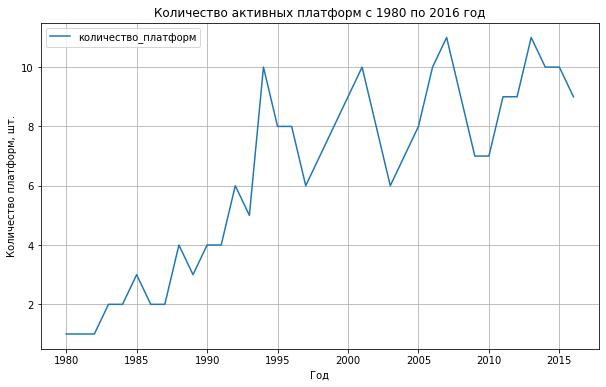

In [60]:
plot_for_years(df['year_of_release'].min(), df['year_of_release'].max())

Наблюдается постепенно рост количества активных игровых платформ. В 2015-му году их количество составляло 10 шт. Так как мы будем делать прогноз на 2017-ый год нужно оставить только те платформы, которые есть на данный момент или были в течение 4-х ближайших лет.

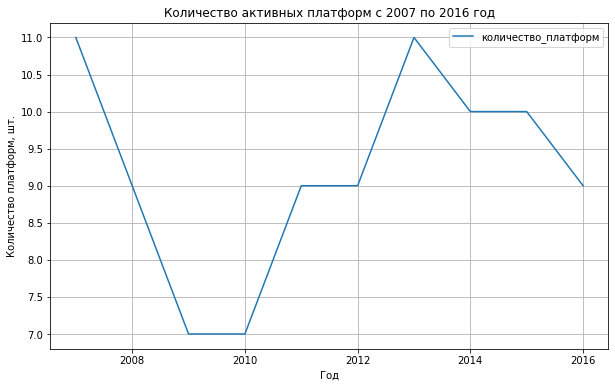

In [61]:
plot_for_years(df['year_of_release'].max()-9, df['year_of_release'].max())

In [62]:
# Функция для отрисовки barplot количества игр в период с .. по ..
def plot_for_years_games(year1, year2):
    platform_df=(
        df
     .query('(year_of_release >= @year1)&(year_of_release<=@year2)')
     .pivot_table(index=['year_of_release'], values='platform', aggfunc='count')
    )
        
    # Вывод графика
    platform_df.plot(kind='bar', figsize=(8, 4), legend=False);
    plt.title('Выпущено игр в год с {} по {} год'.format(year1, year2));
    plt.grid(visible=True)
    plt.ylabel('Количество игр, шт.')
    plt.xlabel('Год')

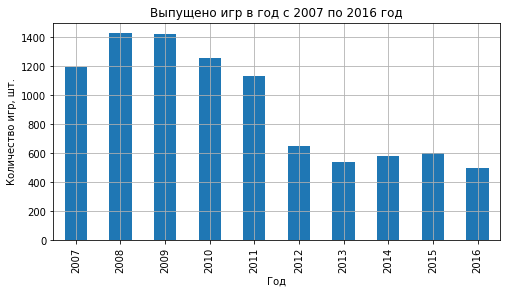

In [63]:
plot_for_years_games(df['year_of_release'].max()-9, df['year_of_release'].max())

Данные можно считать пригодными начиная с 2014-го года -  в это время относительно стабильно количество платформ. Остальные использовать не будем.

In [64]:
# Задаём год начала рассмотрения
year_plt = 2014

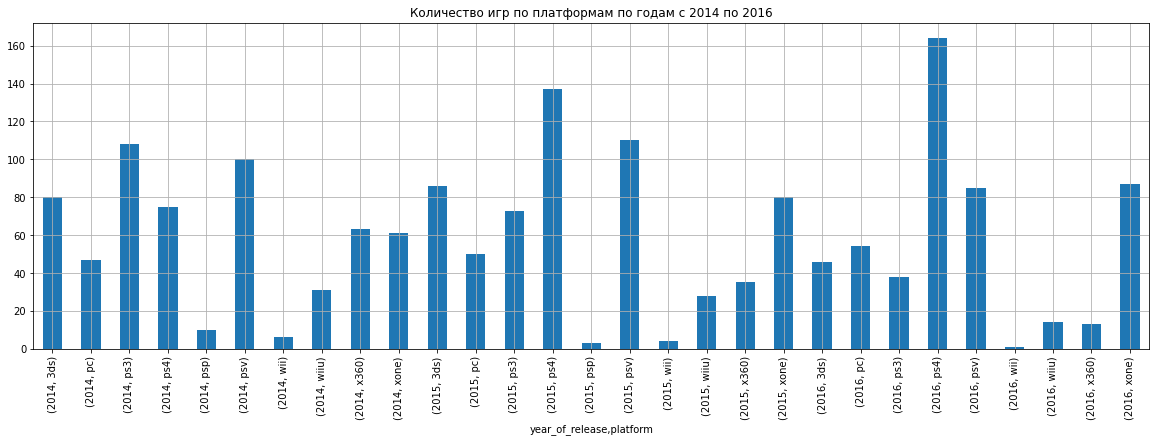

In [65]:
# Количество игр по платформам по годам
(
    df
    .query('year_of_release >= @year_plt')
    .pivot_table(index=['year_of_release','platform'], values='name', aggfunc='count')
    .plot(kind='bar', 
          figsize=(20,6), 
          title='Количество игр по платформам по годам c {} по {}'.format(year_plt, 2016), 
          legend=False, 
          grid=True
         )
);

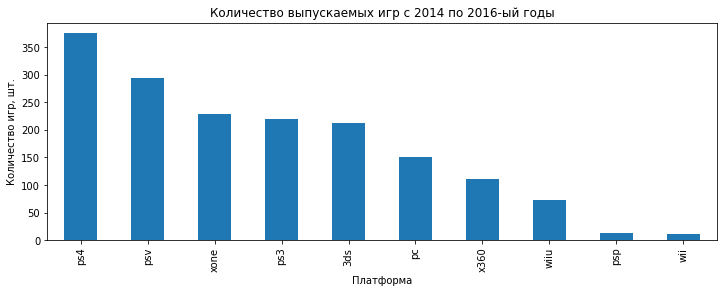

In [66]:
# Количество выпускаемых игр с ... по 2016-ый по годам
(df
 .query('year_of_release >= @year_plt')
 .pivot_table(index=['platform'], values='name', aggfunc='count')
 .sort_values(by='name', ascending=False)
 .plot(kind='bar', figsize=(12,4), legend=False)
);

plt.title('Количество выпускаемых игр с {} по 2016-ый годы'.format(year_plt));
plt.grid(visible=False)
plt.ylabel('Количество игр, шт.');
plt.xlabel('Платформа');

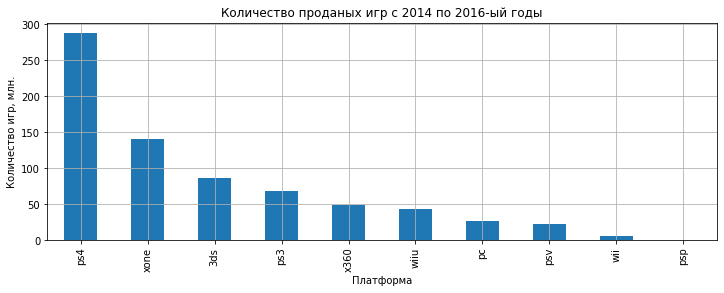

In [67]:
# Количество проданых игр с ... по 2016-ый годы
(
    df
    .query('year_of_release >= @year_plt')
    .pivot_table(index=['platform'], values='all_sales', aggfunc='sum')
    .sort_values(by='all_sales', ascending=False)
    .plot(kind='bar', 
          figsize=(12,4),
          legend=False
         )
);

plt.title('Количество проданых игр с {} по 2016-ый годы'.format(year_plt));
plt.grid(visible=True)
plt.ylabel('Количество игр, млн.');
plt.xlabel('Платформа');

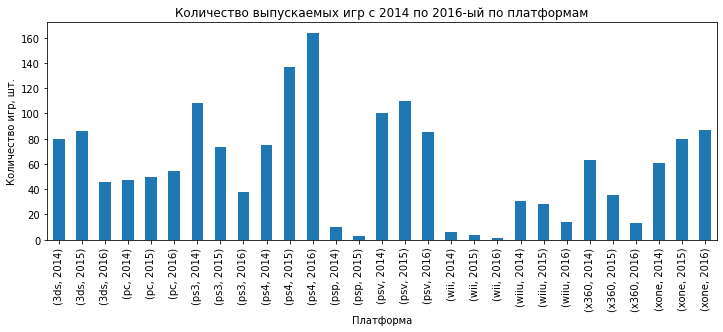

In [68]:
# Количество выпускаемых игр с ... по 2016-ый по годам
(df
 .query('year_of_release >= @year_plt')
 .pivot_table(index=['platform','year_of_release'], values='name', aggfunc='count')
 .plot(kind='bar', figsize=(12,4), legend=False)
);

plt.title('Количество выпускаемых игр с {} по 2016-ый по платформам'.format(year_plt));
plt.grid(visible=False)
plt.ylabel('Количество игр, шт.');
plt.xlabel('Платформа');

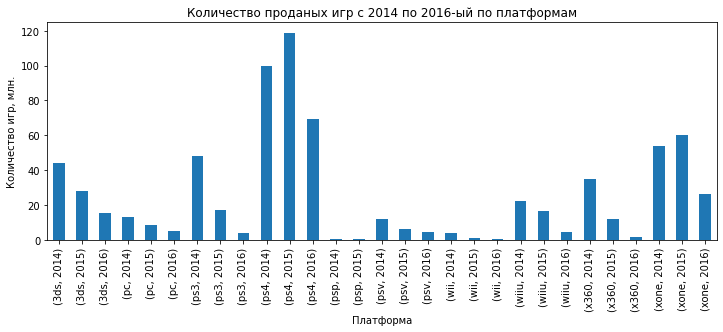

In [69]:
# Количество проданых игр с ... по 2016-ый по годам
(df
    .query('year_of_release >= @year_plt')
    .pivot_table(index=['platform','year_of_release'], values='all_sales', aggfunc='sum')#.sort_values(by='all_sales', ascending=False)
    .plot(kind='bar', 
          figsize=(12,4),
          legend=False
         )
);

plt.title('Количество проданых игр с {} по 2016-ый по платформам'.format(year_plt));
plt.grid(visible=False)
plt.ylabel('Количество игр, млн.');
plt.xlabel('Платформа');

Наиболее популярные платформы по количеству **выпускаемых** игр:
1. PS4;
2. PSV;
4. XOne.

Наиболее популярные платформы по количеству **продаваемых** игр:
1. PS4;
2. XOne;
4. 3DS.

Стоит отметить тенденцию к снижению популярности 3DS, PS3, PSV, X360, Wii U, PSP в то время как **PS4, XOne** набирают популярность.

На всех платформах наблюдается спад в 2016-ом году, сейчас декабрь 2016-го. Если бы были данные поп родажам по месяцам, можно было бы узнать о возможном росте продаж в декабре. Стоит отметить значиетльный спад интереса к X360 и PS3, а также рост XOne и PS4, незначительные колебания платформы PC. Вероятно это связано с постепенным переходам на более новое оборудование и адаптированием игр для новых платформ.

**Вывод:** \
Потенциально прибыльными платформами являются:
- PS4;
- XOne;
- 3DS;
- PC.


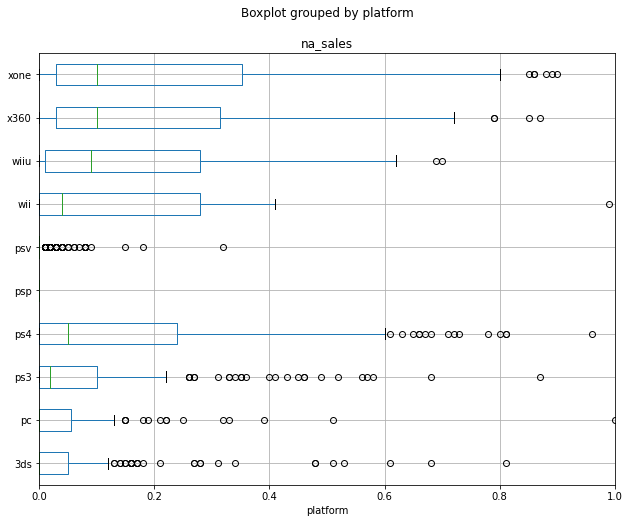

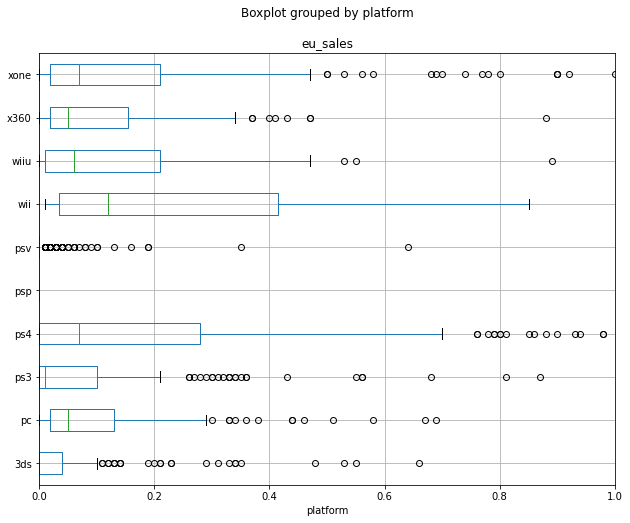

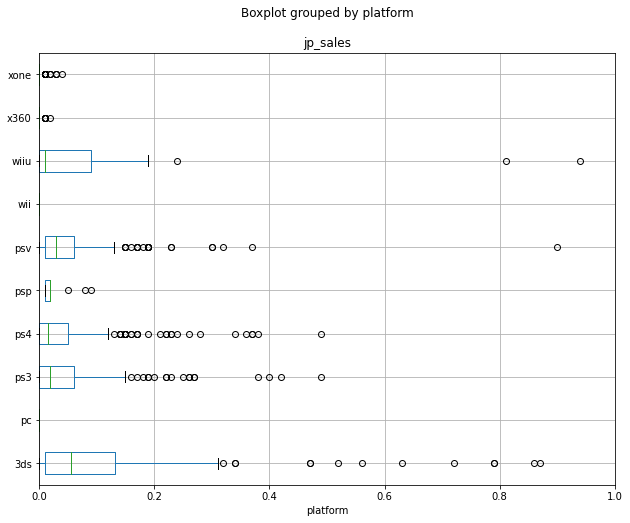

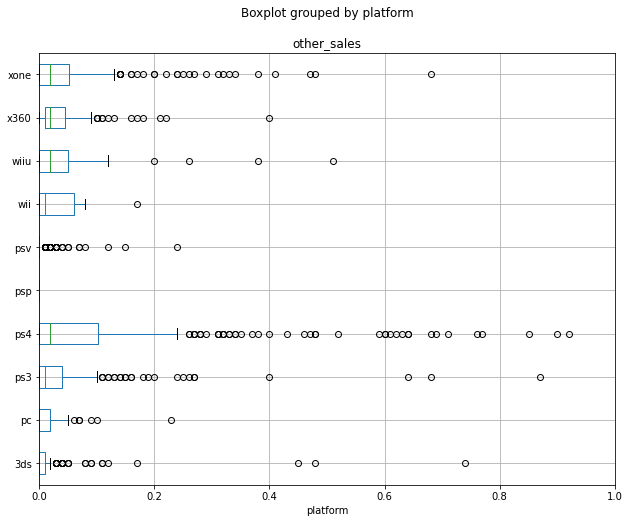

In [70]:
# Масштаб для квантилей
col = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'] #['all_sales', 

# boxplot v.2
for column in col:
    df.query('year_of_release >= @year_plt').boxplot(
        by='platform',
        column=column,
        figsize=(10,8), 
        vert=False
    ).set_xlim([0, 1]);

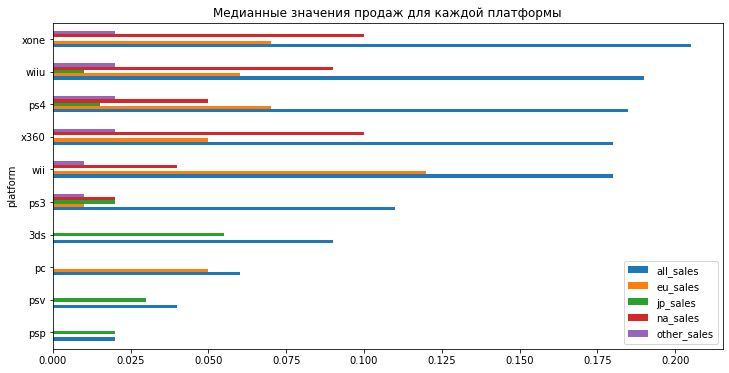

In [71]:
(df
 .query('year_of_release >= @year_plt')
 .pivot_table(index='platform', 
              values=['all_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
              aggfunc='median'
             )
).sort_values(by='all_sales', 
              ascending=True
             ).plot(kind='barh', 
                    figsize=(12,6), 
                    title='Медианные значения продаж для каждой платформы'
                   );

In [72]:
print('Медианы продаж: \n',(df
 .query('year_of_release >= @year_plt')
 .pivot_table(index='platform', 
              values=['all_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
              aggfunc='median')
).median())

Медианы продаж: 
 all_sales      0.1450
eu_sales       0.0500
jp_sales       0.0125
na_sales       0.0300
other_sales    0.0100
dtype: float64


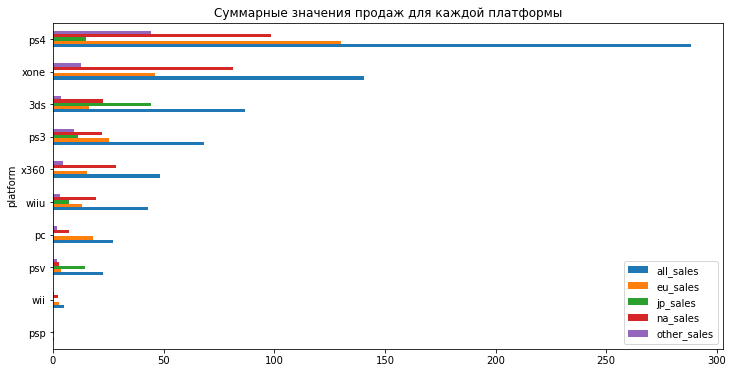

In [73]:
(df
 .query('year_of_release >= @year_plt')
 .pivot_table(index='platform', 
              values=['all_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
              aggfunc='sum'
             )
).sort_values(by='all_sales', 
              ascending=True
             ).plot(kind='barh', 
                    figsize=(12,6), 
                    title='Суммарные значения продаж для каждой платформы'
                   );

**Вывод:**

Диаграмма размаха на актуальной выборке с полным перечнем платформ позволяет сравнить ящики всех актуальных платформ по  распределению сырых данных и основных статистик: основные квартили и количество выбросов.

Квартили позволяют понять какие платформы в данных регионах  более популярны, а какие не пользуются популярностью вовсе. Так, 3DS не пользуется спросом в EU.

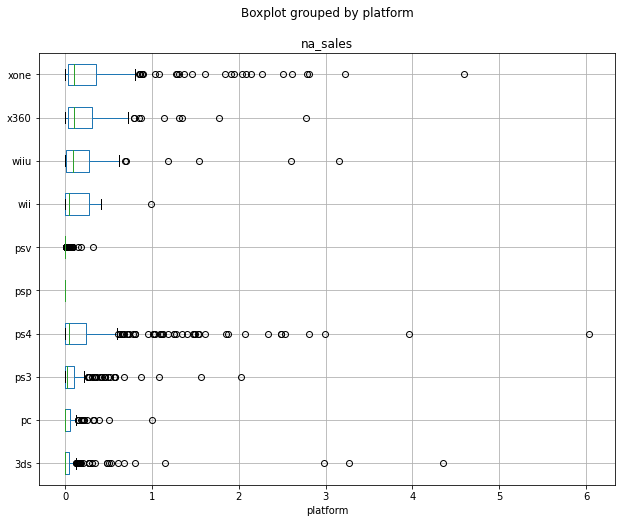

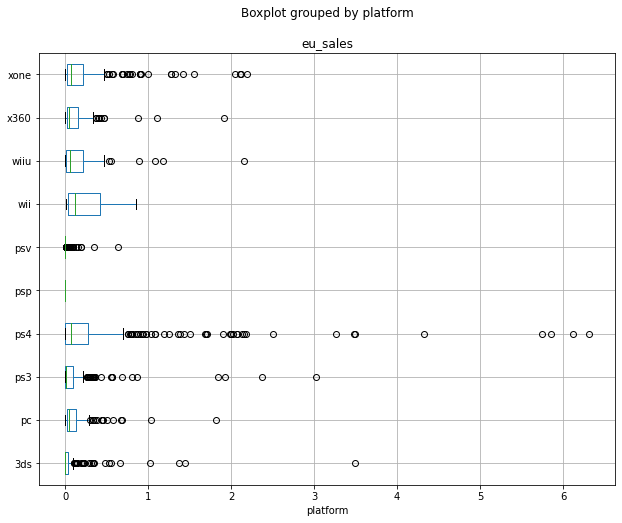

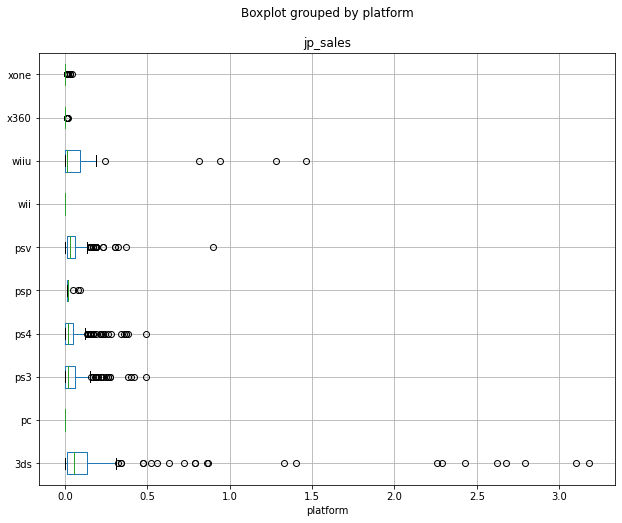

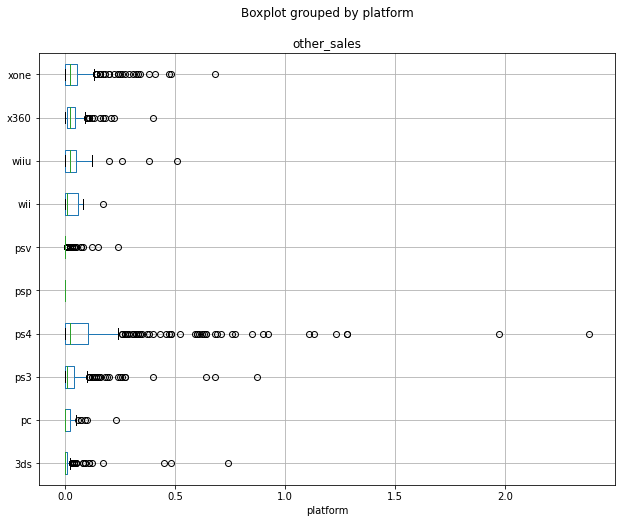

In [74]:
# Масштаб для 100%
col = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'] #['all_sales', 

# boxplot v.2
for column in col:
    df.query('year_of_release >= @year_plt').boxplot(
        by='platform',
        column=column,
        figsize=(10,8), 
        vert=False
    );

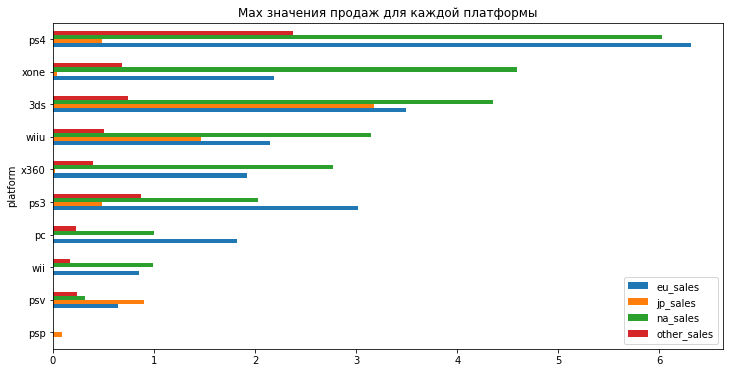

In [75]:
(df
 .query('year_of_release >= @year_plt')
 .pivot_table(index='platform', 
              values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
              aggfunc='max'
             )
).sort_values(by='na_sales', 
              ascending=True
             ).plot(kind='barh', 
                    figsize=(12,6), 
                    title='Max значения продаж для каждой платформы'
                   );

**Вывод:**

Платформа PSP можно сказать заканчивает свою жизнь, продажи остались только в Японии.

### Влияние отзывов на продажи

Для исследования возьмем платформу PS3, как одну из наиболее популярных и актуальных и по сей день.

In [76]:
df.loc[:,'critic_score'] = df['critic_score'].astype(float)
df.loc[:,'user_score'] = df['user_score'].astype(float)
# Создадим dataframe для работы
df_PS3 = df.query('platform == "ps3"')

In [77]:
df_PS3[['name', 'year_of_release', 'critic_score', 'user_score', 'all_sales']]

,name,year_of_release,critic_score,user_score,all_sales
16,grand theft auto v,2013,97.0,8.2,21.05
34,call of duty: black ops ii,2012,83.0,5.3,13.79
37,call of duty: modern warfare 3,2011,88.0,3.2,13.33
41,call of duty: black ops,2010,88.0,6.4,12.63
54,gran turismo 5,2010,84.0,7.5,10.70
...,...,...,...,...,...
16639,wsc real 09: world snooker championship,2009,NaN,NaN,0.01
16674,tsukigime ranko's longest day,2014,NaN,NaN,0.01
16676,g1 jockey 4 2008,2008,NaN,NaN,0.00
16691,dynasty warriors: eiketsuden,2016,NaN,NaN,0.01


In [78]:
# Пропуски
df_PS3[['critic_score', 'user_score']].isna().value_counts().to_frame()

,,0
critic_score,user_score,
False,False,861
True,True,416
False,True,29


In [79]:
print('Размер выборки:', df_PS3.shape[0])
print('Количество пропусков:', df_PS3['user_score'].isna().sum())

print('Процентное соотношение потери информации: {:.2%}'.format(df_PS3['user_score'].isna().sum()/df_PS3.shape[0]))

Размер выборки: 1306
Количество пропусков: 445
Процентное соотношение потери информации: 34.07%


In [80]:
df_PS3.loc[df_PS3['user_score'].isna()].query('all_sales < 6.7').sort_values(by='all_sales')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16676,g1 jockey 4 2008,ps3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,samurai warriors: sanada maru,ps3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
15880,turbo: super stunt squad,ps3,2013,Sports,0.00,0.01,0.00,0.00,38.0,NaN,E,0.01
15891,rugby league live 3,ps3,2015,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16104,nobunaga no yabou online: houou no shou,ps3,2012,Strategy,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
646,tomb raider (2013),ps3,2013,Action,0.60,1.26,0.08,0.48,NaN,NaN,NaN,2.42
599,ratchet & clank future: tools of destruction,ps3,2007,Platform,0.93,1.10,0.08,0.45,NaN,NaN,NaN,2.56
523,need for speed: most wanted,ps3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,2.81
180,minecraft,ps3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN,5.27


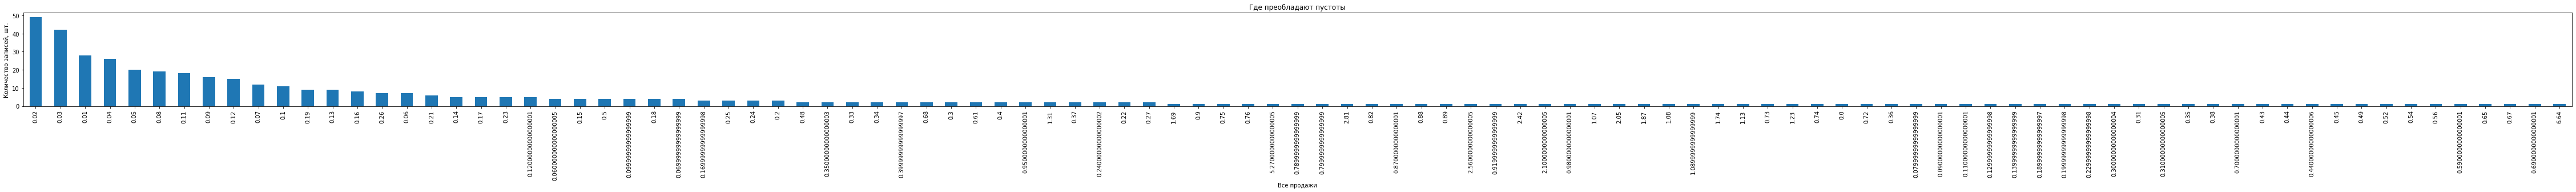

In [81]:
# Где преобладают пустоты
(df_PS3
 .loc[df_PS3['user_score'].isna()]
 .groupby('all_sales')['all_sales']
 .count()
 .sort_values(ascending=False)
 .plot(kind='bar', 
       figsize=(80,3)
      )
)

plt.ylabel('Количество записей, шт.')
plt.xlabel('Все продажи')
plt.title('Где преобладают пустоты')
plt.show();

Пустоты преобладают в областях с малым количеством продаж

In [82]:
df_PS3.pivot_table(index='user_score').sort_values(by='user_score', ascending=False)

,all_sales,critic_score,eu_sales,jp_sales,na_sales,other_sales,year_of_release
user_score,,,,,,,
9.1,5.860000,95.000000,2.180000,0.280000,2.410000,0.990000,2013.000000
9.0,0.410000,93.000000,0.010000,0.030000,0.310000,0.060000,2013.000000
8.9,3.025000,90.000000,0.820000,0.210000,1.605000,0.390000,2009.000000
8.8,2.570000,87.285714,0.831429,0.180000,1.200000,0.358571,2009.714286
8.7,1.684167,86.000000,0.438333,0.136667,0.884167,0.225000,2010.166667
...,...,...,...,...,...,...,...
1.7,0.190000,34.000000,0.083333,0.003333,0.073333,0.030000,2010.000000
1.6,0.360000,16.000000,0.090000,0.000000,0.210000,0.060000,2014.000000
1.0,0.040000,13.000000,0.010000,0.000000,0.020000,0.010000,2013.000000


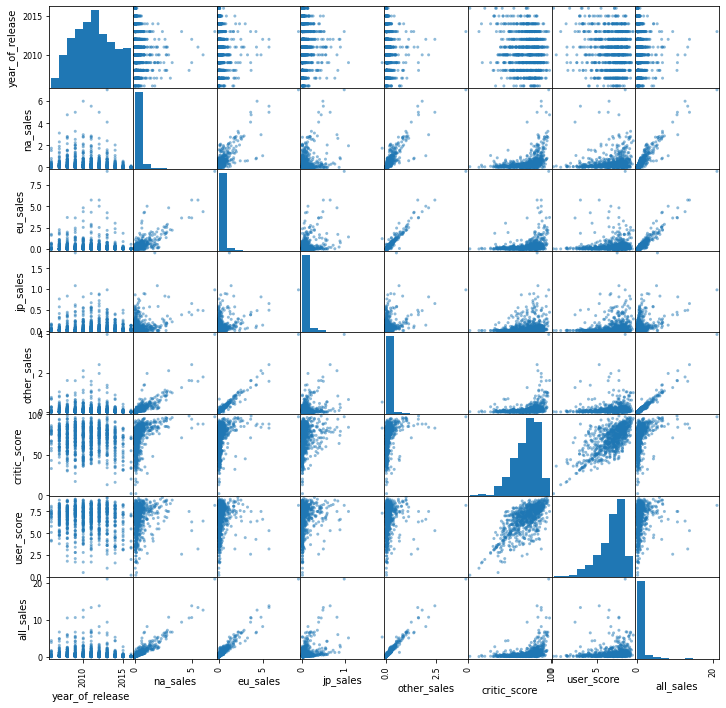

In [83]:
pd.plotting.scatter_matrix(df_PS3, figsize=(12, 12));

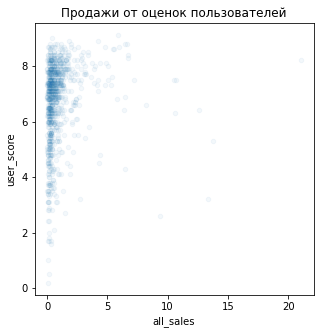

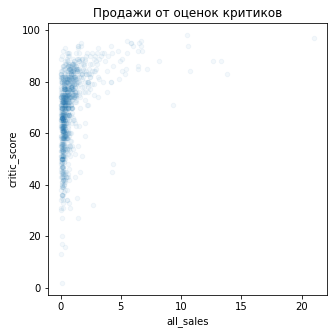

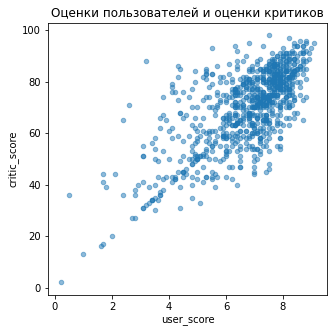

In [84]:
# Зависимости
df_PS3.plot(y='user_score', 
            x='all_sales', 
            kind='scatter', 
            alpha=0.05, 
            figsize=(5,5), 
            title='Продажи от оценок пользователей'
           );

df_PS3.plot(y='critic_score', 
            x='all_sales', 
            kind='scatter', 
            alpha=0.05, 
            figsize=(5,5), 
            title='Продажи от оценок критиков'
           );

df_PS3.plot(y='critic_score', 
            x='user_score', 
            kind='scatter', 
            alpha=0.5, 
            figsize=(5,5), 
            title='Оценки пользователей и оценки критиков'
           );

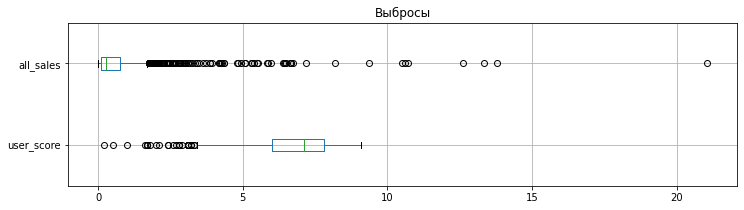

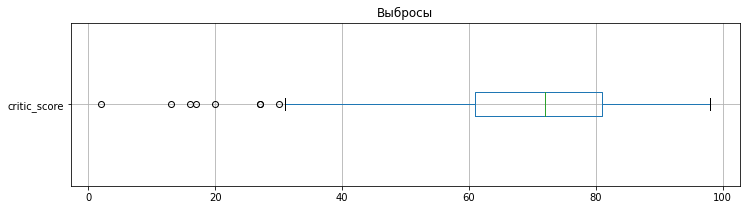

In [85]:
df_PS3[['user_score', 'all_sales']].boxplot(vert=False, figsize=(12,3)).set_title('Выбросы');
plt.show()
df_PS3[['critic_score']].boxplot(vert=False, figsize=(12,3)).set_title('Выбросы');

Видно, что с увеличением оценки увеличивается количество продаж, однако есть и случаи с большим количеством продаж при низких оценках. Низкие оценки практически линейно совпадают с оценками критиков, что несколько странно: высоки оценки пользователей и крайне низкие оценки критиков. В остальном наблюдается слабая положительная корреляция.

In [86]:
# Коэффициенты корреляции Пирсона PS3

#print('Коэффициент корреляции Пирсона по отзывам:', 
#      round(df_PS3['user_score'].corr(df_PS3['critic_score']), 2)
#     )

print('Коэффициент корреляции Пирсона для пользовательских отзывов:', 
      round(df_PS3['user_score'].corr(df_PS3['all_sales']), 2)
     )

print('Коэффициент корреляции Пирсона для отзывов критиков:', 
      round(df_PS3['critic_score'].corr(df_PS3['all_sales']), 2)
     )

Коэффициент корреляции Пирсона для пользовательских отзывов: 0.13
Коэффициент корреляции Пирсона для отзывов критиков: 0.39


Уберем из `all_sales` значения более 5.

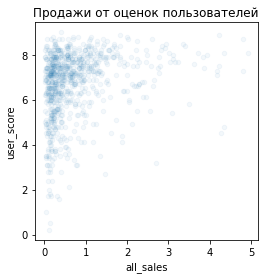

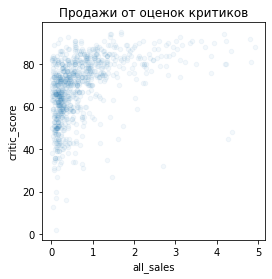

In [87]:
# Зависимости PS3
df_PS3.query('all_sales <= 5').plot(y='user_score', 
            x='all_sales', 
            kind='scatter', 
            alpha=0.05, 
            figsize=(4,4), 
            title='Продажи от оценок пользователей'
           );

df_PS3.query('all_sales <= 5').plot(y='critic_score', 
            x='all_sales', 
            kind='scatter', 
            alpha=0.05, 
            figsize=(4,4), 
            title='Продажи от оценок критиков'
           );

In [88]:
# Коэффициенты корреляции Пирсона PS3

#print('Коэффициент корреляции Пирсона по отзывам:', 
#      round(df_PS3.query('all_sales <= 5')['user_score'].corr(df_PS3.query('all_sales <= 5')['critic_score']), 2)
#     )

print('Коэффициент корреляции Пирсона для пользовательских отзывов:', 
      round(df_PS3.query('all_sales <= 5')['user_score'].corr(df_PS3.query('all_sales <= 5')['all_sales']), 2)
     )

print('Коэффициент корреляции Пирсона для отзывов критиков:', 
      round(df_PS3.query('all_sales <= 5')['critic_score'].corr(df_PS3.query('all_sales <= 5')['all_sales']), 2)
     )

Коэффициент корреляции Пирсона для пользовательских отзывов: 0.24
Коэффициент корреляции Пирсона для отзывов критиков: 0.43


Положительный результат не был получен.

Рассмотрим весь датасет.

In [89]:
# Коэффициенты корреляции Пирсона весь датасет

#print('Коэффициент корреляции Пирсона по отзывам:', 
#      round(df['user_score'].corr(df['critic_score']), 2)
#     )

print('Коэффициент корреляции Пирсона для пользовательских отзывов:', 
      round(df['user_score'].corr(df['all_sales']), 2)
     )

print('Коэффициент корреляции Пирсона для отзывов критиков:', 
      round(df['critic_score'].corr(df['all_sales']), 2)
     )

Коэффициент корреляции Пирсона для пользовательских отзывов: 0.09
Коэффициент корреляции Пирсона для отзывов критиков: 0.23


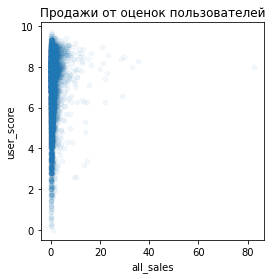

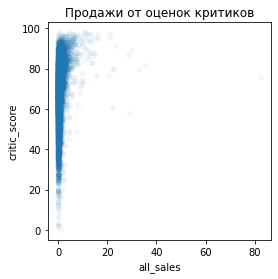

In [90]:
# Зависимости для весго датасета
df.plot(y='user_score', 
            x='all_sales', 
            kind='scatter', 
            alpha=0.05, 
            figsize=(4,4), 
            title='Продажи от оценок пользователей'
           );

df.plot(y='critic_score', 
            x='all_sales', 
            kind='scatter', 
            alpha=0.05, 
            figsize=(4,4), 
            title='Продажи от оценок критиков'
           );

Как видно, выборка из одной популярной платформы практически идентична по пользовательским отзывам, и указывает примерное расположение для отзывов критиков.

In [91]:
# Коэффициенты корреляции Пирсона X360

#print('Коэффициент корреляции Пирсона по отзывам:', 
#      round(df.query('platform == "x360"')['user_score'].corr(df.query('platform == "x360"')['critic_score']), 2)
#     )

print('Коэффициент корреляции Пирсона для пользовательских отзывов:', 
      round(df.query('platform == "x360"')['user_score'].corr(df.query('platform == "x360"')['all_sales']), 2)
     )

print('Коэффициент корреляции Пирсона для отзывов критиков:', 
      round(df.query('platform == "x360"')['critic_score'].corr(df.query('platform == "x360"')['all_sales']), 2)
     )

Коэффициент корреляции Пирсона для пользовательских отзывов: 0.11
Коэффициент корреляции Пирсона для отзывов критиков: 0.37


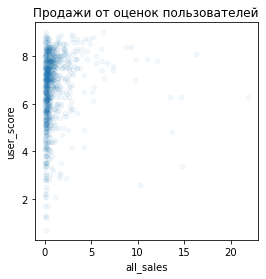

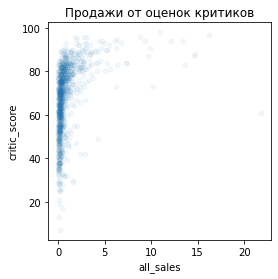

In [92]:
# Зависимости для platform == "x360"
df.query('platform == "x360"').plot(y='user_score', 
            x='all_sales', 
            kind='scatter', 
            alpha=0.05, 
            figsize=(4,4), 
            title='Продажи от оценок пользователей'
           );

df.query('platform == "x360"').plot(y='critic_score', 
            x='all_sales', 
            kind='scatter', 
            alpha=0.05, 
            figsize=(4,4), 
            title='Продажи от оценок критиков'
           );

Сравнивая две платформы PS3 и Xbox 360 можно прийти к выводу: линейной зависимости между отзывами и продажами нет. Однако, при отывах с оценкой выше (2,5 / 25) баллов наблюдается "сгущение" продаж - то есть **при оценке выше этой игры будут продаваться, если это не протеворечит другим параметрам.**

In [93]:
df.pivot_table(index='genre', aggfunc='mean').sort_values(by='all_sales', ascending=False)

,all_sales,critic_score,eu_sales,jp_sales,na_sales,other_sales,user_score,year_of_release
genre,,,,,,,,
Platform,0.940262,67.765166,0.227096,0.148872,0.506196,0.058098,7.305896,2003.857631
Shooter,0.803519,69.944792,0.242685,0.029846,0.451258,0.079730,7.053260,2006.033179
Role-Playing,0.628683,72.792829,0.127103,0.238616,0.222849,0.040115,7.624423,2007.117488
Racing,0.589748,67.601299,0.191204,0.046111,0.290854,0.061579,7.044374,2004.866558
Sports,0.570039,70.703988,0.161652,0.058343,0.292343,0.057701,6.959467,2005.495686
Fighting,0.531814,69.244656,0.119356,0.104153,0.265012,0.043294,7.295949,2004.653938
Action,0.519156,66.643713,0.154593,0.048419,0.261031,0.055113,7.058932,2008.055640
Misc,0.459204,66.516304,0.122371,0.062185,0.232173,0.042475,6.805828,2007.328298
Simulation,0.452695,68.402597,0.132264,0.074259,0.210502,0.035671,7.132153,2006.647608


Самые низкие показатели у жанра `Adventure`, он был популярен в 2008-ом году, оценка пользователей близится к 7-ми, в то время как критики ставят около 60-ти баллов.

Наиболее прибыльным оказался жанр `Platform` ("платформер"): оценка критиков 94 из 100, пользователей - 7 баллов, однако этот жанр был наиболее популярен в 2003 году.

Рассмотрим более современную выборку: начиная с 2012-го года.

In [94]:
(
    df
    .query('year_of_release >= 2012')
    .pivot_table(index='genre', aggfunc='mean')
    .sort_values(by='all_sales', ascending=False)
)

,all_sales,critic_score,eu_sales,jp_sales,na_sales,other_sales,user_score,year_of_release
genre,,,,,,,,
Shooter,1.296723,72.065990,0.482851,0.039277,0.616043,0.158553,6.435897,2013.885106
Platform,0.717647,72.626866,0.251882,0.101529,0.298588,0.065647,6.806061,2013.823529
Sports,0.675634,65.263959,0.257799,0.029888,0.304216,0.083731,5.455897,2013.977612
Role-Playing,0.521081,73.128655,0.131162,0.176865,0.172973,0.040081,7.258480,2013.889189
Racing,0.465217,70.397727,0.237304,0.021739,0.149739,0.056435,6.151163,2013.913043
Misc,0.442917,71.558824,0.137083,0.066979,0.198906,0.039948,6.938806,2013.932292
Simulation,0.439000,65.545455,0.181875,0.130125,0.099625,0.027375,6.511905,2013.962500
Action,0.427781,70.259470,0.154641,0.051163,0.172384,0.049593,6.828244,2013.932171
Fighting,0.408165,70.300000,0.098991,0.086606,0.181560,0.041009,6.895714,2013.770642


У жанра `Adventure` по-прежнему большие проблемы с продажами, однако стоит отметить рост оценки среди пользователей - 2-ое место. На первое место вышел жанр `Shooter`.

Возьмем ещё более свежие данные.

In [95]:
(
    df
    .query('year_of_release >= 2015')
    .pivot_table(index='genre', aggfunc='mean')
    .sort_values(by='all_sales', ascending=False)
)

,all_sales,critic_score,eu_sales,jp_sales,na_sales,other_sales,user_score,year_of_release
genre,,,,,,,,
Shooter,1.305309,73.953125,0.497284,0.046790,0.594815,0.166420,6.388710,2015.580247
Sports,0.601215,60.771084,0.260000,0.015421,0.245888,0.079907,5.198780,2015.448598
Role-Playing,0.422879,77.127273,0.130379,0.101591,0.150152,0.040758,7.772727,2015.409091
Fighting,0.334324,71.434783,0.100541,0.041622,0.149730,0.042432,6.886957,2015.432432
Platform,0.331429,72.047619,0.114286,0.050714,0.135000,0.031429,6.245000,2015.535714
Racing,0.258571,70.333333,0.155238,0.006905,0.067143,0.029286,6.610714,2015.571429
Action,0.236961,70.190722,0.080789,0.053480,0.078144,0.024548,6.808290,2015.412993
Simulation,0.228788,66.750000,0.113333,0.058485,0.041212,0.015758,6.515789,2015.545455
Misc,0.199577,70.800000,0.060000,0.044930,0.078592,0.016056,6.658333,2015.450704


Жанр `Shooter` по-прежнему лидирует и имеет наибольшие продажи в 2016-ом году, как и в 2015-ом.

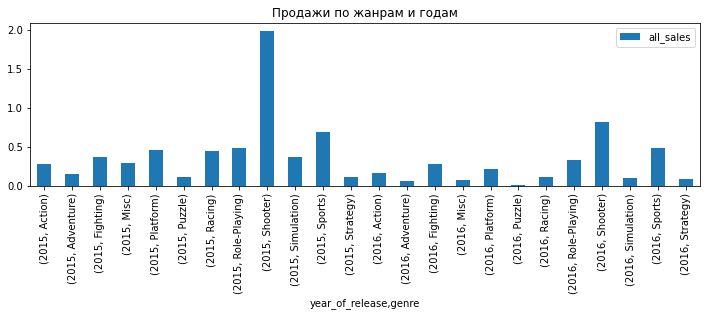

In [96]:
# Изобразим графически
(df
 .query('year_of_release >= 2015')
 .pivot_table(index=['year_of_release', 'genre'], values='all_sales')
 .plot(kind='bar', figsize=(12,3))
 .set_title('Продажи по жанрам и годам')
);

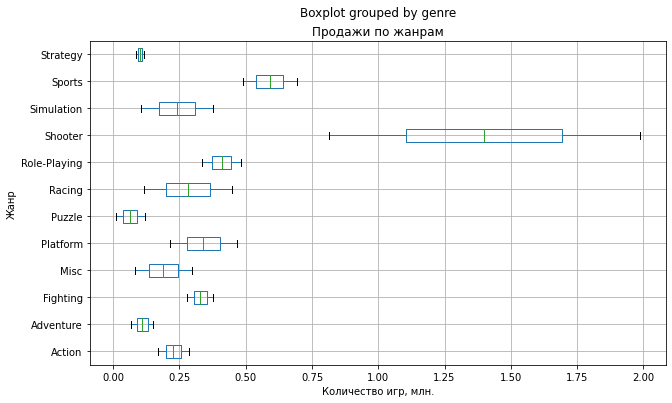

In [97]:
# Изобразим графически boxplot
(df
 .query('year_of_release >= 2015')
 .pivot_table(index=['year_of_release', 'genre'], values='all_sales')
 .boxplot(by=['genre'], figsize=(10,6), vert=False)
 .set_title('Продажи по жанрам')
);

plt.ylabel('Жанр');
plt.xlabel('Количество игр, млн.');

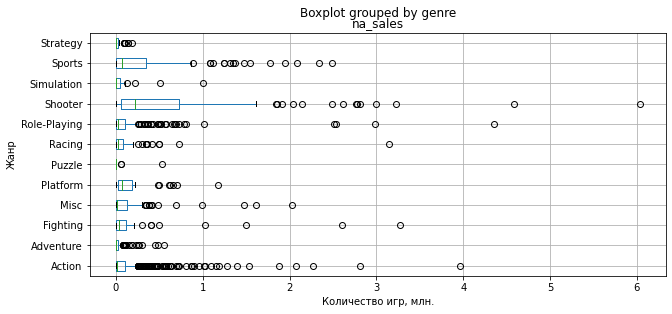

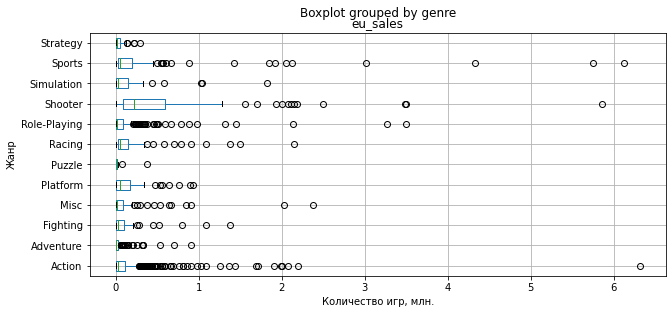

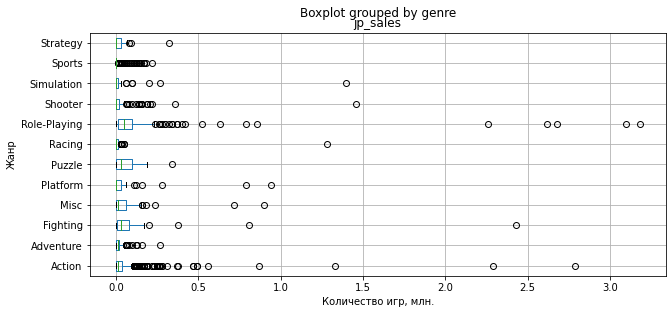

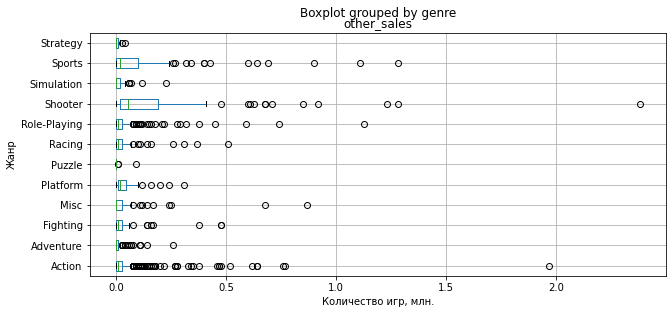

In [98]:
# Масштаб для 100%
col = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'] #['all_sales', 

#f, ax = plt.subplots(3, 2)
#col_ = 0
#str_ = 0

# boxplot v.2
for column in col:
    df.query('year_of_release >= @year_plt').boxplot(
        by='genre',
        column=column,
        figsize=(10,4.5), 
        vert=False,
        #layout= (1, 4) # (rows, columns)
    );
    
    plt.ylabel('Жанр');
    plt.xlabel('Количество игр, млн.');

    #col_ += 1
    #if col_ % 3 == 0:
    #    str_ += 1
    #    col_ = 0

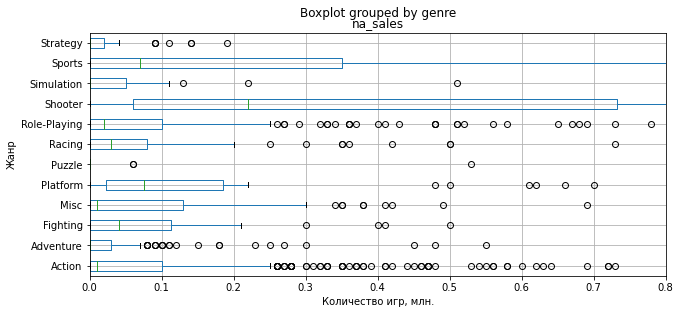

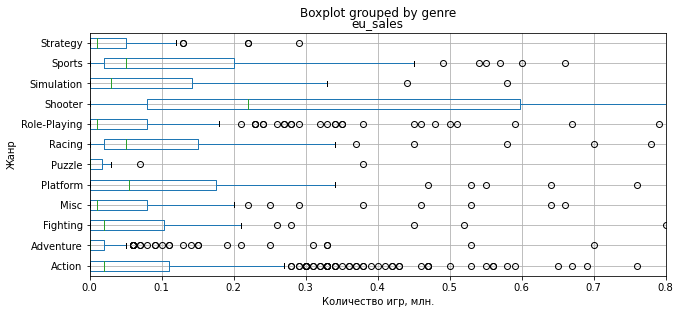

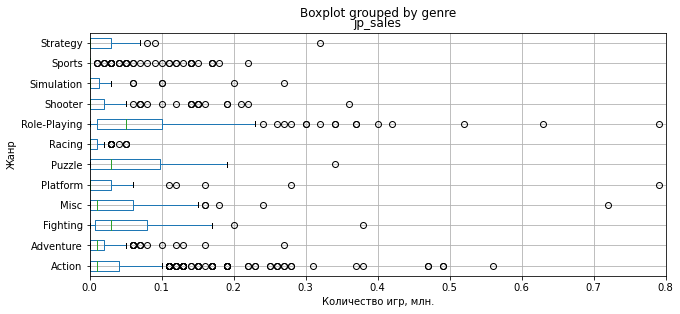

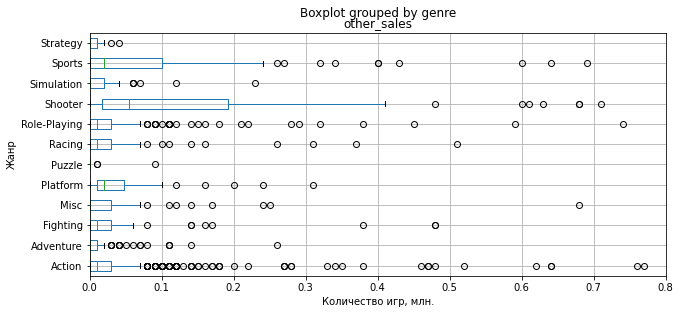

In [99]:
# Масштаб для квантиля
col = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'] #['all_sales', 

#f, ax = plt.subplots(3, 2)
#col_ = 0
#str_ = 0

# boxplot v.2
for column in col:
    df.query('year_of_release >= @year_plt').boxplot(
        by='genre',
        column=column,
        figsize=(10,4.5), 
        vert=False,
        #layout= (1, 4) # (rows, columns)
    ).set_xlim([0, 0.8]);
    
    plt.ylabel('Жанр');
    plt.xlabel('Количество игр, млн.');

    #col_ += 1
    #if col_ % 3 == 0:
    #    str_ += 1
    #    col_ = 0

Наиболее стабилен и имеет наиболее длинный ряд успешно продающихся игр жанр `shooter`. Худшие показатели показывает жанр `puzzle`, но в Японии ситуация обстоит иначе. Однако жанр `adventure` имеет везде низкие показатели.

### Портрет пользователя каждого региона

Для актуализации данных возьмем период не ранее 2014-го года.

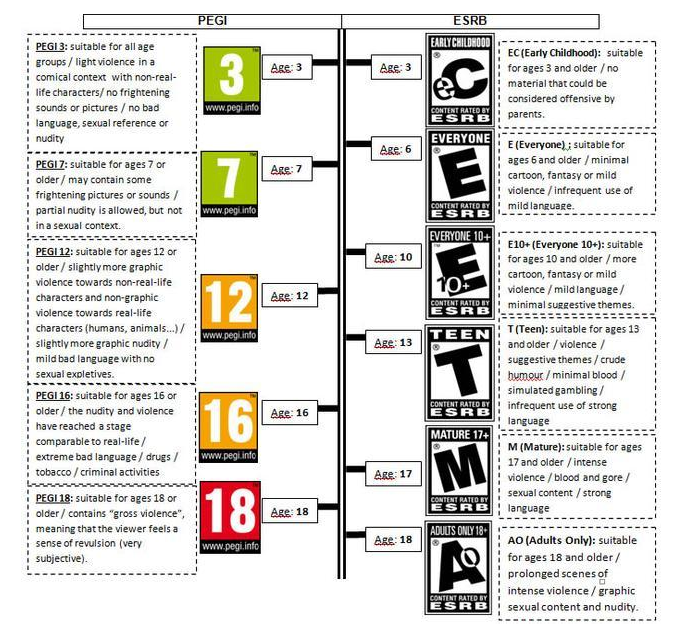

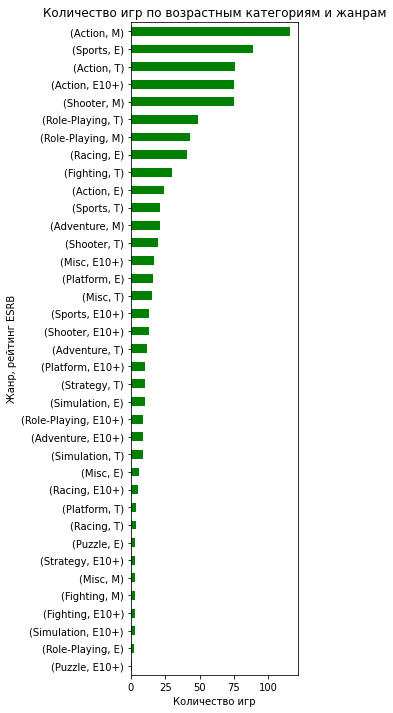

In [100]:
# Гистограмма распределения количества игр по возрастным категориям и жанрам
(df[~df['critic_score'].isna()]
 .query('year_of_release >= 2014')[['genre','rating','name']]
 .groupby(['genre','rating'])
 .count()
 .sort_values(by='name', ascending=True)
 .plot(kind='barh', 
       figsize=(3,12),
       color='green',
       title=('Количество игр по возрастным категориям и жанрам'),
       legend=False
      )
);

plt.xlabel('Количество игр');
plt.ylabel('Жанр, рейтинг ESRB');

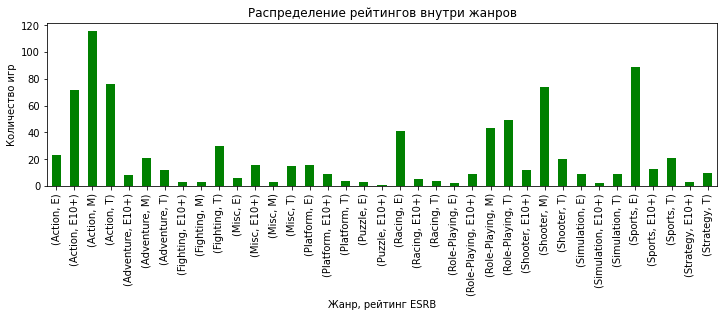

In [101]:
# Гистограмма распределения количества игр по возрастным категориям и жанрам
df[~df['critic_score'].isna()].query('year_of_release >= 2014').pivot_table(index=['genre','rating'], 
                  values='user_score', 
                  aggfunc='count'
                 ).plot(kind='bar', 
                        color='green', 
                        figsize=(12,3),
                        title=('Распределение рейтингов внутри жанров'),
                        legend=False
                       );
plt.ylabel('Количество игр');
plt.xlabel('Жанр, рейтинг ESRB');

#### Пропуски в *rating*
Попытаемся поработать над [пропусками в рейтингах](#comment_1).

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16460 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  int64  
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     8564 non-null   float64
 9   user_score       7473 non-null   float64
 10  rating           9779 non-null   object 
 11  all_sales        16460 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [103]:
df['rating'].isna().sum()

6681

In [104]:
df[df['rating'].isna()].isna().value_counts().to_frame()

0
name  platform year_of_release genre na_sales eu_sales jp_sales other_sales critic_score user_score rating all_sales      
False False    False           False False    False    False    False       True         True       True   False      6584
                                                                            False        False      True   False        84
                                                                                         True       True   False        13

Пропуски в `genrer` отсутствуют, значит по жанру можно предположительно "проставить" рейтинг, как типовой (мода).

In [105]:
col

['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

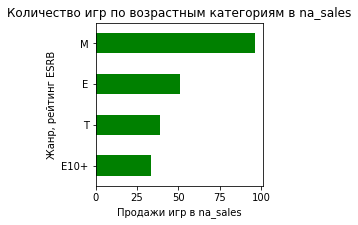

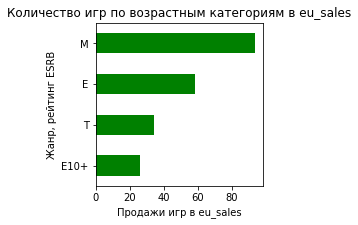

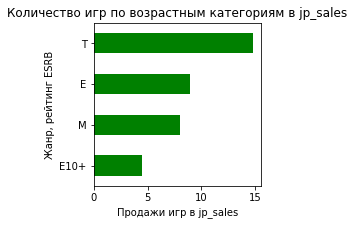

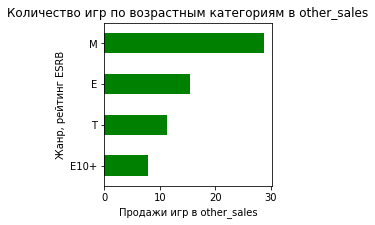

In [106]:
# Гистограмма распределения количества игр по возрастным категориям и жанрам
for col_ in col:
    (df
     .query('year_of_release >= 2014')[['genre','rating','name', col_]]
     .groupby(['rating'])[col_]
     .sum()
     .sort_values(ascending=True).head(8)
     .plot(kind='barh', 
           figsize=(3,3),
           color='green',
           title=('Количество игр по возрастным категориям в '+col_),
           legend=False
          )
    );

    plt.xlabel('Продажи игр в '+col_);
    plt.ylabel('Жанр, рейтинг ESRB');
    plt.show()

In [109]:
df['rating'] = df['rating'].fillna('unknown')

In [110]:
df['rating'].isna().sum()

0

#### NA

In [111]:
def sales_info(sales):
    print('\n', 'Регион', sales, '\n')
    
    # Создадим adtaframe для работы
    df_sales = (df[['name', 'platform', 'year_of_release', 
     'genre', sales, 'critic_score', 
     'user_score', 'rating'#,'all_sales'
    ]].sort_values(sales, ascending=False)
    )
    
    # С фильтром пропусков
    #df_sales = df_sales[~df_sales['critic_score'].isna()].query('year_of_release >= 2014')
    
    # Без фильтра пропусков
    df_sales = df_sales.query('year_of_release >= 2014')
    
    # Суммарные продажи по платформам
    print('\n', 'Самые популярные платформы (топ-5)')
    print('\n', 'По продажам (топ-5)')
    tabl = (df_sales
            .pivot_table(index='platform',values=sales,aggfunc='sum')
            .sort_values(sales, ascending=False)
            #.rename(columns={str(sales):'количество'})
            .head()
            
           )
    
    # Отображаем таблицу
    display(tabl.rename(columns={sales:'продажи, млн.'}))
    
    # Выводим диаграмму
    tabl.sort_values(sales, 
                     ascending=True
                    ).plot(kind='barh', 
                           figsize=(4,3), 
                           legend=False
                          );
    
    plt.ylabel('Платформа');
    plt.xlabel('Количество продаж, млн.');
    plt.title('Популярные платформы в ' + sales);
    plt.show();
    
    #print('\n', 'По числу выпущенных игр (топ-5)')
    
    # Число выпущенных игр по платформам
    #display(df_sales
    #        .pivot_table(index='platform', values='name', aggfunc='count')
    #        .sort_values('name', ascending=False)
    #        .rename(columns={'name':'количество'})
    #        .head()
    #        
    #       )
    
    #print('\n', 'Количество выпущенных игр по жанрам (топ-5)')
     
    # Количество выпущенных игр по жанрам
    #display(df_sales
    # .groupby('genre')['rating']
    # .count()
    # .to_frame()
    # .sort_values(by='rating', ascending=False)
    # .rename(columns={'rating':'количество'})
    # .head()       
    #)
    
    
    # Суммарные продажи по жанрам
    print('\n', 'Самые популярные жанры (топ-5)')
    #display(df_sales
    #        .pivot_table(index='genre',values=sales,aggfunc='sum')
    #        .sort_values(sales, ascending=False)
    #        .head()
    #       )
    
    # Узнаем наиболее встречаемый рейтинг
    gen_df = []
    rat_df = []

    for gen in df_sales['genre'].unique():
        gen_df.append(gen)
        rat_df.append(statistics.mode(df_sales.query('genre == @gen')['rating']))

        
    #pd.DataFrame(data={'genre':gen_df, 'Рейтинг':rat_df})
    
    # Присоединяем к таблице с жанрами рейтинг
    tabl = (df_sales
     .pivot_table(index='genre',values=sales,aggfunc='sum')
     .sort_values(sales, ascending=False)
     .head()
     .merge(pd.DataFrame(data={'genre':gen_df, 
                               'Рейтинг ESRB (мода)':rat_df}
                        ), on='genre'
           )
    )
    
    # Отображаем таблицу
    display(tabl)
    
    # Выводим диаграмму
    tabl.sort_values(sales, 
                     ascending=True
                    ).plot(kind='barh', 
                           x='genre', 
                           figsize=(4,3), 
                           legend=False
                          );
    plt.ylabel('Жанр');
    plt.xlabel('Количество продаж, млн.');
    plt.title('Популярные жанры в ' + sales);
    plt.show();


 Регион na_sales 


 Самые популярные платформы (топ-5)

 По продажам (топ-5)


,"продажи, млн."
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05


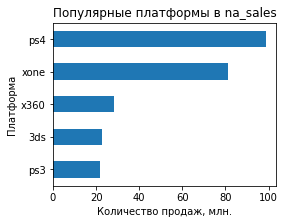


 Самые популярные жанры (топ-5)


,genre,na_sales,Рейтинг ESRB (мода)
0,Shooter,79.02,M
1,Action,72.53,unknown
2,Sports,46.13,E
3,Role-Playing,33.47,unknown
4,Misc,15.05,unknown


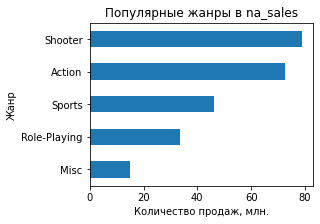

In [112]:
sales_info('na_sales')

<b> ВЫВОДЫ: </b>

Наибольшей популярностью в с 2014-го года пользуются:
1. PS4;
2. XOne;
3. X360;
4. 3DS;
5. PS3.

Наибольшей популярностью в с 2014-го года пользуются:
1. Shooter;
2. Action;
3. Sports;
4. Role-Playing;
5. Misc.

Наиболее популярны игры с рейтингом M и unknown.

#### JP

In [113]:
(
        df
            .query('year_of_release >= 2014')
            .pivot_table(index='platform',values= 'jp_sales', aggfunc='sum')
            .sort_values('jp_sales', ascending=False)
            .head()
)

,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31



 Регион jp_sales 


 Самые популярные платформы (топ-5)

 По продажам (топ-5)


,"продажи, млн."
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31


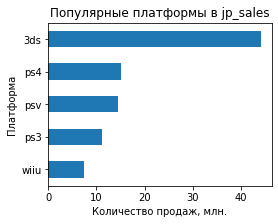


 Самые популярные жанры (топ-5)


,genre,jp_sales,Рейтинг ESRB (мода)
0,Role-Playing,31.16,unknown
1,Action,29.58,unknown
2,Fighting,6.37,T
3,Misc,5.61,unknown
4,Shooter,4.87,M


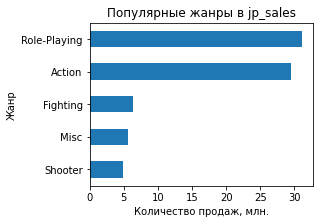

In [114]:
sales_info('jp_sales')

<b> ВЫВОДЫ: </b>

Наибольшей популярностью в с 2014-го года пользуются:
1. 3DS;
2. PS4;
3. PSV;
4. PS3;
5. Wii U.

Наибольшей популярностью в с 2014-го года пользуются:
1. Role-Playing;
2. Action;
3. Fighting;
4. Misc;
5. Shooter.

Наиболее популярны игры с рейтингом unknown.

#### EU


 Регион eu_sales 


 Самые популярные платформы (топ-5)

 По продажам (топ-5)


,"продажи, млн."
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12


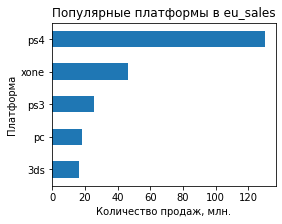


 Самые популярные жанры (топ-5)


,genre,eu_sales,Рейтинг ESRB (мода)
0,Action,74.68,unknown
1,Shooter,65.52,M
2,Sports,45.73,E
3,Role-Playing,28.17,unknown
4,Racing,14.13,E


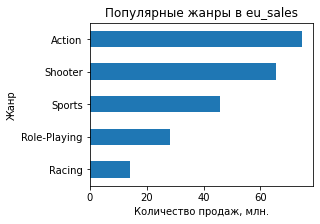

In [115]:
sales_info('eu_sales')

<b> ВЫВОДЫ: </b>

Наибольшей популярностью в с 2014-го года пользуются:
1. PS4;
2. XOne;
3. PS3;
4. PC;
5. 3DS.

Наибольшей популярностью в с 2014-го года пользуются:
1. Action;
2. Shooter;
3. Sports;
4. Role-Playing;
5. Racing.

Наиболее популярны игры с рейтингами unknown и M.

**<span class="mark">ОБЩИЙ ВЫВОД:</span>** 

Различия в долях продаж разных платформ зависят скорее всего от местого рынка производства. Так, в США и Евросоюзе есть и свои производства и схожие интересы в играх, в то время как в Японии предпочтение Nintendo 3DS, так как эта система была разработана в Японии.

Также влияет и "жизненный цикл" этих платформ. X360 начал сдавать свои позиции, в то время как XOne начал их только завоевывать, также как PS3 и PS4.

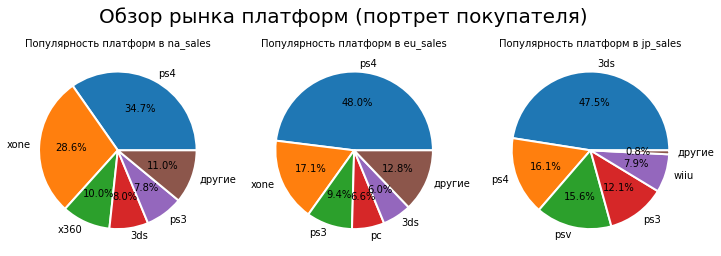

In [116]:
# Графики

# Функция для процентов на графике
def my_fmt(x):
        #print(x)
        return '{:.1f}%'.format(x, abs(df_NA[sales1].sum())*x/100)



# Графики
f, ax = plt.subplots(1, 3)

i = 0

for sales1 in ['na_sales', 'eu_sales', 'jp_sales']:
      
    df_NA = (df[['name', 'platform', 'year_of_release', 
     'genre', sales1, 'critic_score', 
     'user_score', 'rating'
    ]].sort_values(sales1, ascending=False)
    )


    # Без фильтра пропусков
    df_NA = df_NA.query('year_of_release >= 2014')
    
    df_NA = (df_NA
        .pivot_table(index='platform', values=sales1, aggfunc='sum')
        .sort_values(sales1, ascending=False)
    )

    df_NA2 = (df_NA
        .pivot_table(index='platform', values=sales1, aggfunc='sum')
        .sort_values(sales1, ascending=False)
        .head()
          )

    df_NA2.loc['другие'] = abs(df_NA[sales1].sum()-df_NA2[sales1].sum())
    #display(df2)
    
    ax[i].pie(df_NA2[sales1], labels = df_NA2.index, autopct=my_fmt, wedgeprops={'lw':2,'edgecolor':"white"})
    ax[i].set_title('Популярность платформ в {}'.format(sales1),fontsize = 10)
    i += 1

    
f.suptitle('Обзор рынка платформ (портрет покупателя)',
                 y = 1,
                 fontsize = 20)
f.set_size_inches(12, 4)    
plt.show()

### Гипотезы

#### Гипотеза №1
Предположим, что `средние пользовательские рейтинги платформ Xbox One и PC одинаковые`.

**Нулевая гипотеза:** \
Если средние значения пользвательских рейтингов равны, то рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза:**\
Рейтинги платформ Xbox One и PC разные.

`alpha = 0.05 = 5%`

In [117]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'all_sales'],
      dtype='object')

In [118]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

In [119]:
# Массивы для сравнения
df_XBOX = df[~df['user_score'].isna()].query('(platform == "xone")&(year_of_release >= 2014)')['user_score']
df_XBOX = df_XBOX[len(df_XBOX)-100:len(df_XBOX)]
print('Размер df_XBOX:', df_XBOX.shape[0])
print('Среднее df_XBOX:', df_XBOX.mean())

print()

df_PC = df[~df['user_score'].isna()].query('(platform == "pc")&(year_of_release >= 2014)')['user_score']
df_PC = df_PC[len(df_PC)-100:len(df_PC)]
print('Размер df_PC:', df_PC.shape[0])
print('Среднее df_PC:', df_PC.mean())

Размер df_XBOX: 100
Среднее df_XBOX: 6.605000000000001

Размер df_PC: 100
Среднее df_PC: 6.281999999999999


In [120]:
# check

df[~df['user_score'].isna()].query('(platform == "xone")').year_of_release.unique()

array([2014, 2015, 2013, 2016])

In [121]:
df[~df['user_score'].isna()].query('(platform == "pc")').year_of_release.unique()

array([2009, 2004, 2012, 2010, 1997, 2007, 2011, 2002, 2014, 2000, 2001,
       1998, 2003, 2013, 1996, 2008, 2015, 2005, 2016, 2006, 1999, 1985,
       1992, 1988])

In [122]:
# Сравнение массивов
display(
    df[~df['user_score'].isna()].query('(platform == "xone")&(year_of_release >= 2014)').year_of_release.unique()
)
df[~df['user_score'].isna()].query('(platform == "pc")&(year_of_release >= 2014)').year_of_release.unique()

array([2014, 2015, 2016])

array([2014, 2015, 2016])

In [123]:
# Проверка гипотезы
results = st.ttest_ind(df_XBOX, df_PC, equal_var = False)

print('p-значение: {:0.3%}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 16.017%
Не получилось отвергнуть нулевую гипотезу


**Вывод:** \
Мы пришли к **нулевой** гипотезе: <span class="girk"> рейтинги платформ Xbox One и PC одинаковые</span>.

In [124]:
# Если средние значения пользвательских рейтингов равны, то рейтинги жанров Action и Sports одинаковые.
# Средние пользовательские рейтинги жанров Action и Sports не равны.

#### Гипотеза №2
Предположим, что `средние пользовательские рейтинги жанров Action и Sports разные`.

**Нулевая гипотеза:** \
Средние пользовательские рейтинги жанров Action и Sports равны.

**Альтернативная гипотеза:**\
Рейтинги жанров Action и Sports не равны.

`alpha = 0.01 = 1%`

In [125]:
alpha = .01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

In [126]:
# Массивы для сравнения
df_act = df[~df['user_score'].isna()].query('(genre == "Action")')['user_score']
df_act = df_act[0:1000]
print('Размер df_act:', df_act.shape[0])
print('Среднее df_act:', df_act.mean())

print()

df_sport = df[~df['user_score'].isna()].query('(genre == "Sports")')['user_score']
df_sport = df_sport[0:1000]
print('Размер df_sport:', df_sport.shape[0])
print('Среднее df_sport:', df_sport.mean())

Размер df_act: 1000
Среднее df_act: 7.231700000000001

Размер df_sport: 1000
Среднее df_sport: 7.0085999999999995


In [127]:
# Проверка гипотезы
results = st.ttest_ind(df_act, df_sport, equal_var = True)

print('p-значение: {:0.3%}'.format(results.pvalue))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.061%
p-значение: 0.0006145041917623065
Отвергаем нулевую гипотезу


**Вывод:** \
Мы пришли к альтернативной гипотезе: <span class="girk">средние пользовательские рейтинги жанров Action и Sports не равны</span>.

## Общий вывод

Декабрь 2016 г.

Были проанализивароны исторические данные из открытого источника о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Задача: необходимо выяснить закономерности, определяющие успешность игры, позволяющие сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<center><b>ВЫПУСК ИГР</b></center>

Стоит отметить снижение количества выпускаемых игр за год при общем росте количества платформ для разработке игр.

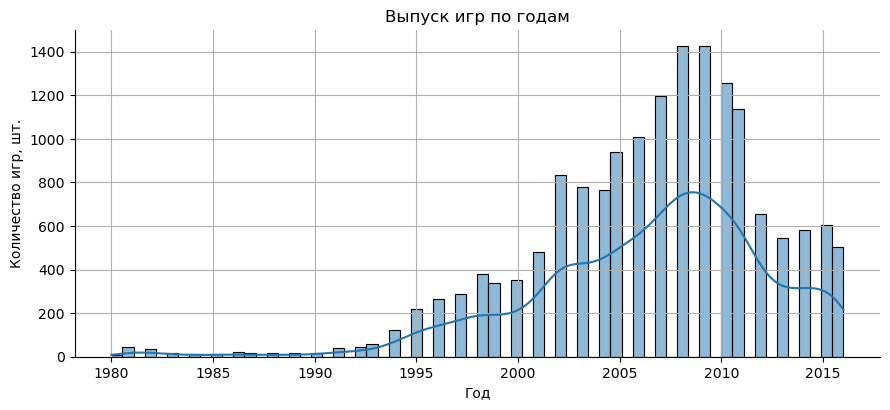

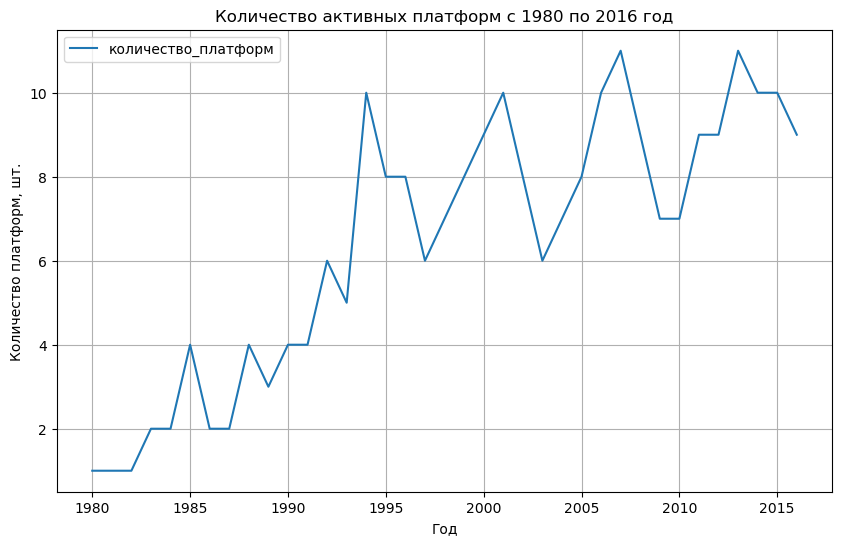

* <a id='plt_life'>Среднее количество лет</a> жизни крупной платформы: 7,18.
* Среднее количество лет жизни маленькой платформы: 3,93.

Так, платформы DS, PS2 уже закончили свой срок "популярной жизни", а PS3 и Xbox 360 "идут в закат". На место этих платформ приходят PS4 и Xbox One. Стабильную нишу занимают компьютерные игры (PC) - в последние годы несильно меняются значения продаж.


Для поддержания актуальности данных был рассмотрен период 2014-2016 годы.

Наиболее популярные платформы по количеству **выпускаемых** игр:
1. PS4;
2. PSV;
4. XOne.

Наиболее популярные платформы по количеству **продаваемых** игр:
1. PS4;
2. XOne;
4. 3DS.

Стоит отметить тенденцию к снижению популярности 3DS, PS3, PSV, X360, Wii U, PSP в то время как **PS4, XOne** набирают популярность.

На всех платформах наблюдается спад в 2016-ом году, сейчас декабрь 2016-го. Если бы были данные по продажам по месяцам, можно было бы узнать о возможном росте продаж в декабре. Стоит отметить значительный спад интереса к X360 и PS3, а также рост XOne и PS4, незначительные колебания платформы PC. Вероятно это связано с постепенным переходом на более новое оборудование и адаптированием игр для новых платформ.

**Вывод:** \
Потенциально прибыльными платформами являются:
- PS4;
- XOne;
- 3DS;
- PC.

<center><b>ПРИБЫЛЬНОСТЬ ЖАНРОВ НА ДИАГРАММЕ РАЗМАХА</b></center>

Наиболее стабилен и имеет наиболее длинный ряд успешно продающихся игр жанр `shooter`. Худшие показатели показывает жанр `puzzle`, но в Японии ситуация обстоит иначе. Однако жанр `adventure` имеет везде низкие показатели.

Стабильные в США:
1. shooter;
2. platform;
3. sport.

Стабильные в EU:
1. shooter;
2. sports;
3. racing.

Стабильные в JP:
1. role-playing;
2. fighting;
3. puzzle.

<center><b>ВЛИЯНИЕ ОТЗЫВОВ</b></center>

Было рассмотрено влияние отзывов на продаваемость игр. 
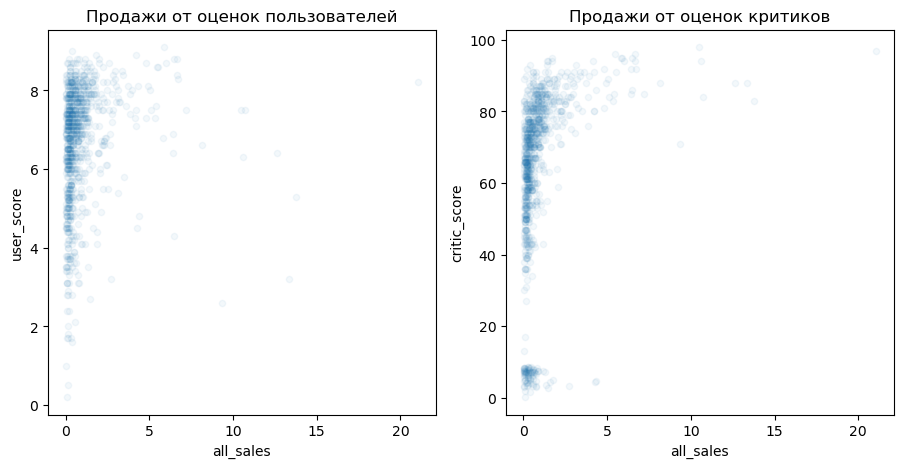

Сравнивая две платформы PS3 и Xbox 360 можно прийти к выводу: линейной зависимости между отзывами и продажами нет. Однако, при отывах с оценкой выше (2,5 / 25) баллов наблюдается "сгущение" продаж - то есть при оценке выше этой игры будут продаваться, если это не протеворечит другим параметрам.

<center><b>ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ ПО РЕГИОНАМ</b></center>

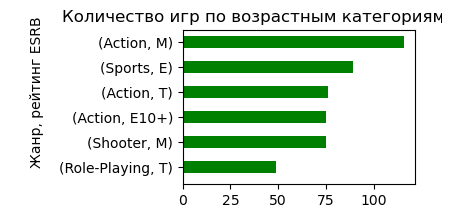

**США**

Наибольшей популярностью в с 2014-го года пользуются:
1. PS4;
2. XOne;
3. X360;
4. 3DS;
5. PS3.

Наибольшей популярностью в с 2014-го года пользуются:
1. Shooter;
2. Action;
3. Sports;
4. Role-Playing;
5. Misc.

Наиболее популярны игры с рейтингом M и unknown

**Япония**

Наибольшей популярностью в с 2014-го года пользуются:
1. 3DS;
2. PS4;
3. PSV;
4. PS3;
5. Wii U.

Наибольшей популярностью в с 2014-го года пользуются:
1. Role-Playing;
2. Action;
3. Fighting;
4. Misc;
5. Shooter.

Наиболее популярны игры с рейтингами unknown.

**Евросоюз**

Наибольшей популярностью в с 2014-го года пользуются:
1. PS4;
2. XOne;
3. PS3;
4. PC;
5. 3DS.

Наибольшей популярностью в с 2014-го года пользуются:
1. Action;
2. Shooter;
3. Sports;
4. Role-Playing;
5. Racing.

Наиболее популярны игры с рейтингом unknown и M.

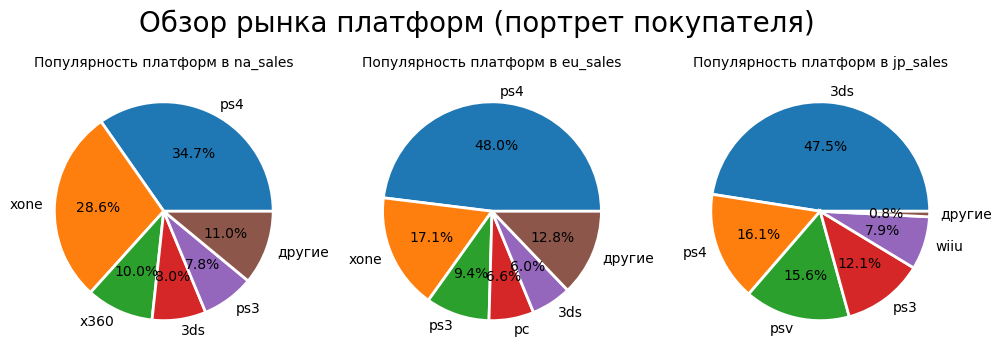

**ВЫВОД:**

Различия в долях продаж разных платформ зависят скорее всего от местого рынка производства. Так, в США и Евросоюзе есть и свои производства и схожие интересы в играх, в то время как в Японии предпочтение Nintendo 3DS, так как эта система была разработана в Японии.

Также влияет и "жизненный цикл" этих платформ. X360 начал сдавать свои позиции, в то время как XOne начал их только завоевывать, также как PS3 и PS4.

<center><b>ГИПОТЕЗЫ</b></center>

Выводы по гипотезам:
* **№1 Рейтинги платформ Xbox One и PC одинаковые** - отвергнуть гипотезу не удалось;
* **№2 Средние пользовательские рейтинги жанров Action и Sports одинаковые**: наблюдается значимое различие. С вероятностью в 0.061% такое или большее различие в средних пользовательских рейтингах жанров можно получить случайно, что показывает крайне маловероятные результаты Н0. Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports разные.